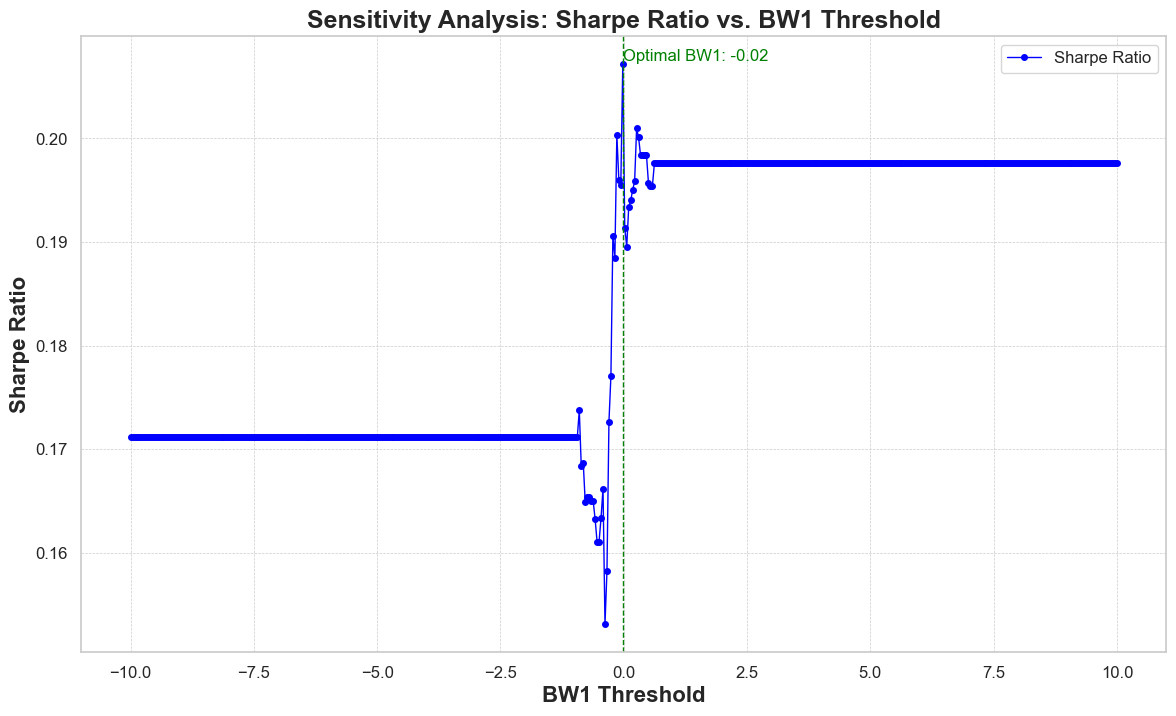

The best threshold for BW1 is: -0.02
The final portfolio value using the best threshold is: $381910.80
Final portfolio value if only Large Cap Return was held: $340850.15
Final portfolio value if only Small Cap Return was held: $375133.59
The number of binary signals generated by the trading strategy is: 178
The number of switches between Small Cap and Large Cap returns is: 18
The portfolio was invested in Small Cap returns for 43 periods (24.16% of the time).
The portfolio was invested in Large Cap returns for 135 periods (75.84% of the time).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    # Calculate the Sharpe ratio
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / excess_returns.std()

def find_optimal_threshold(data, variable_name, initial_investment=100000, threshold_range=(-10, 10), num_thresholds=500):
    # Prepare the data
    data = data.dropna(subset=['Small Cap Return', 'Large Cap Return', variable_name])
    data['Small Cap Return'] = data['Small Cap Return'].ffill()
    data['Large Cap Return'] = data['Large Cap Return'].ffill()
    data[variable_name] = data[variable_name].ffill()

    # Define the range of thresholds to test
    thresholds = np.linspace(min(data[variable_name].min(), threshold_range[0]), max(data[variable_name].max(), threshold_range[1]), num_thresholds)

    # Store Sharpe ratios for each threshold
    sharpe_ratios = []

    # Variables to store the optimal threshold and its Sharpe ratio
    optimal_threshold = None
    max_sharpe_ratio = -np.inf

    # Variables to store the best trade signals and portfolio value
    best_trade_signals = None
    best_portfolio_value = None

    # Perform grid search to find the optimal threshold and calculate Sharpe ratio
    for threshold in thresholds:
        # Generate trade signals based on the previous period's variable value
        data['Trade Signal'] = data[variable_name].shift(1).apply(lambda x: 1 if x > threshold else 0)
        
        # Select returns based on the trade signal, defaulting to Large Cap Return
        data['Selected Return'] = data.apply(
            lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
        
        # Calculate the strategy returns
        data['Strategy Return'] = data['Selected Return']
        
        # Calculate the portfolio value over time
        data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return'] / 100).cumprod()
        
        # Calculate the Sharpe ratio
        sharpe_ratio = calculate_sharpe_ratio(data['Strategy Return'])
        sharpe_ratios.append(sharpe_ratio)
        
        # Check if this is the maximum Sharpe ratio
        if sharpe_ratio > max_sharpe_ratio:
            max_sharpe_ratio = sharpe_ratio
            optimal_threshold = threshold
            best_trade_signals = data['Trade Signal'].copy()
            best_portfolio_value = data['Portfolio Value'].iloc[-1]

    # Set the style of the visualization
    sns.set(style="whitegrid")

    # Plot the sensitivity analysis
    plt.figure(figsize=(14, 8))

    # Plot the Sharpe ratios
    plt.plot(thresholds, sharpe_ratios, label='Sharpe Ratio', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

    # Add a visual cue for the optimal threshold
    plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
    plt.text(optimal_threshold, max(sharpe_ratios), f'Optimal {variable_name}: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

    # Add titles and labels
    plt.title(f'Sensitivity Analysis: Sharpe Ratio vs. {variable_name} Threshold', fontsize=18, fontweight='bold')
    plt.xlabel(f'{variable_name} Threshold', fontsize=16, fontweight='bold')
    plt.ylabel('Sharpe Ratio', fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate the number of binary signals generated
    num_signals = best_trade_signals.count()

    # Calculate the number of switches between Small Cap and Large Cap returns
    num_switches = (best_trade_signals.diff().abs() == 1).sum()

    # Calculate the average composition of the portfolio
    num_small_cap = (best_trade_signals == 1).sum()
    num_large_cap = (best_trade_signals == 0).sum()
    total_periods = len(best_trade_signals)

    # Print the results
    print(f"The best threshold for {variable_name} is: {optimal_threshold:.2f}")
    print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
    print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
    print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
    print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
    print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Example usage:
data = pd.read_csv("Insampletrainingdata.csv")
find_optimal_threshold(data, 'BW1', initial_investment=100000, threshold_range=(-10, 10), num_thresholds=500)


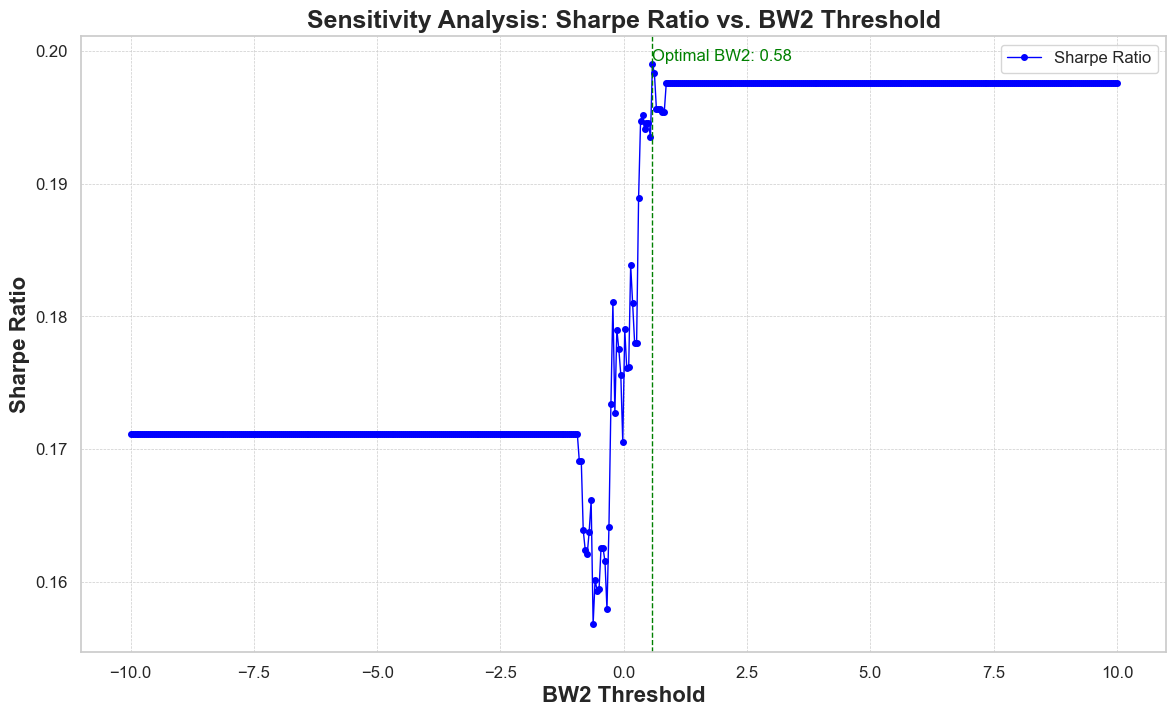

The best threshold for BW2 is: 0.58
The final portfolio value using the best threshold is: $342992.81
Final portfolio value if only Large Cap Return was held: $340850.15
Final portfolio value if only Small Cap Return was held: $375133.59
The number of binary signals generated by the trading strategy is: 178
The number of switches between Small Cap and Large Cap returns is: 4
The portfolio was invested in Small Cap returns for 4 periods (2.25% of the time).
The portfolio was invested in Large Cap returns for 174 periods (97.75% of the time).


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    # Calculate the Sharpe ratio
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / excess_returns.std()

def find_optimal_threshold(data, variable_name, initial_investment=100000, threshold_range=(-10, 10), num_thresholds=500):
    # Prepare the data
    data = data.dropna(subset=['Small Cap Return', 'Large Cap Return', variable_name])
    data['Small Cap Return'] = data['Small Cap Return'].ffill()
    data['Large Cap Return'] = data['Large Cap Return'].ffill()
    data[variable_name] = data[variable_name].ffill()

    # Define the range of thresholds to test
    thresholds = np.linspace(min(data[variable_name].min(), threshold_range[0]), max(data[variable_name].max(), threshold_range[1]), num_thresholds)

    # Store Sharpe ratios for each threshold
    sharpe_ratios = []

    # Variables to store the optimal threshold and its Sharpe ratio
    optimal_threshold = None
    max_sharpe_ratio = -np.inf

    # Variables to store the best trade signals and portfolio value
    best_trade_signals = None
    best_portfolio_value = None

    # Perform grid search to find the optimal threshold and calculate Sharpe ratio
    for threshold in thresholds:
        # Generate trade signals based on the previous period's variable value
        data['Trade Signal'] = data[variable_name].shift(1).apply(lambda x: 1 if x > threshold else 0)
        
        # Select returns based on the trade signal, defaulting to Large Cap Return
        data['Selected Return'] = data.apply(
            lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
        
        # Calculate the strategy returns
        data['Strategy Return'] = data['Selected Return']
        
        # Calculate the portfolio value over time
        data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return'] / 100).cumprod()
        
        # Calculate the Sharpe ratio
        sharpe_ratio = calculate_sharpe_ratio(data['Strategy Return'])
        sharpe_ratios.append(sharpe_ratio)
        
        # Check if this is the maximum Sharpe ratio
        if sharpe_ratio > max_sharpe_ratio:
            max_sharpe_ratio = sharpe_ratio
            optimal_threshold = threshold
            best_trade_signals = data['Trade Signal'].copy()
            best_portfolio_value = data['Portfolio Value'].iloc[-1]

    # Set the style of the visualization
    sns.set(style="whitegrid")

    # Plot the sensitivity analysis
    plt.figure(figsize=(14, 8))

    # Plot the Sharpe ratios
    plt.plot(thresholds, sharpe_ratios, label='Sharpe Ratio', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

    # Add a visual cue for the optimal threshold
    plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
    plt.text(optimal_threshold, max(sharpe_ratios), f'Optimal {variable_name}: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

    # Add titles and labels
    plt.title(f'Sensitivity Analysis: Sharpe Ratio vs. {variable_name} Threshold', fontsize=18, fontweight='bold')
    plt.xlabel(f'{variable_name} Threshold', fontsize=16, fontweight='bold')
    plt.ylabel('Sharpe Ratio', fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate the number of binary signals generated
    num_signals = best_trade_signals.count()

    # Calculate the number of switches between Small Cap and Large Cap returns
    num_switches = (best_trade_signals.diff().abs() == 1).sum()

    # Calculate the average composition of the portfolio
    num_small_cap = (best_trade_signals == 1).sum()
    num_large_cap = (best_trade_signals == 0).sum()
    total_periods = len(best_trade_signals)

    # Print the results
    print(f"The best threshold for {variable_name} is: {optimal_threshold:.2f}")
    print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
    print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
    print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
    print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
    print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Example usage:
data = pd.read_csv("Insampletrainingdata.csv")
find_optimal_threshold(data, 'BW2', initial_investment=100000, threshold_range=(-10, 10), num_thresholds=500)


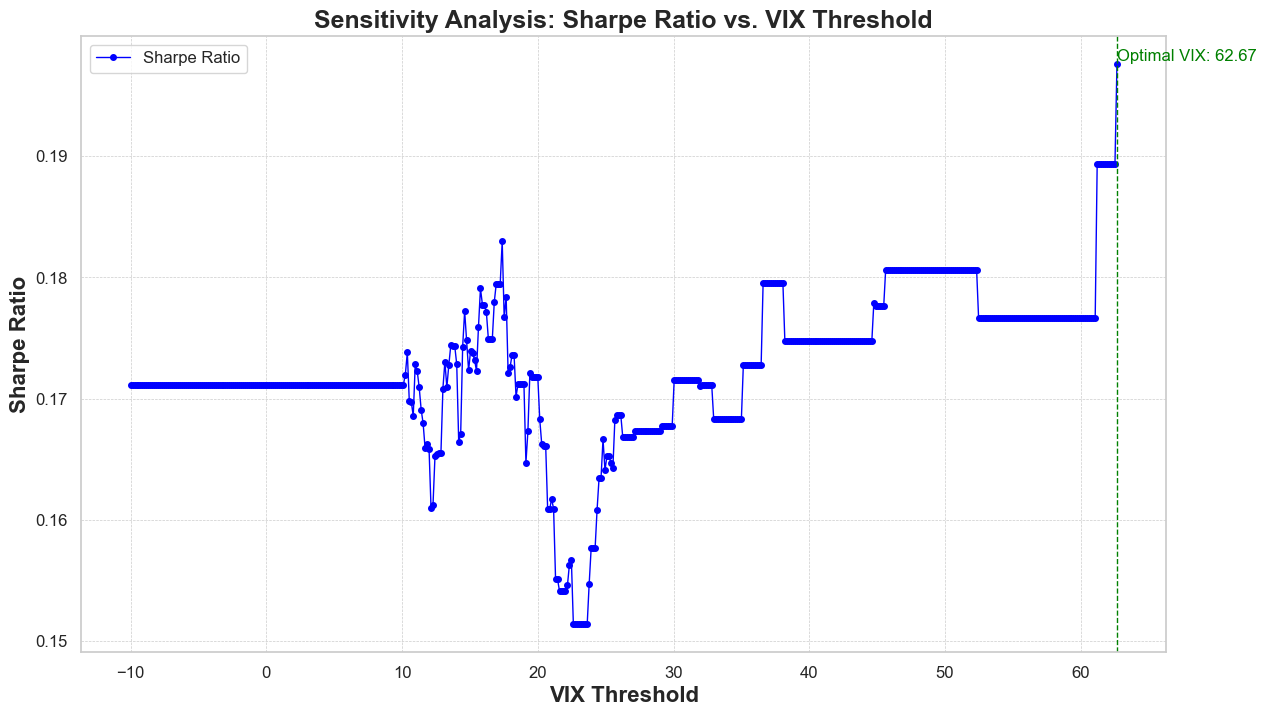

The best threshold for VIX is: 62.67
The final portfolio value using the best threshold is: $340850.15
Final portfolio value if only Large Cap Return was held: $340850.15
Final portfolio value if only Small Cap Return was held: $375133.59
The number of binary signals generated by the trading strategy is: 178
The number of switches between Small Cap and Large Cap returns is: 0
The portfolio was invested in Small Cap returns for 0 periods (0.00% of the time).
The portfolio was invested in Large Cap returns for 178 periods (100.00% of the time).


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    # Calculate the Sharpe ratio
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / excess_returns.std()

def find_optimal_threshold(data, variable_name, initial_investment=100000, threshold_range=(-10, 10), num_thresholds=500):
    # Prepare the data
    data = data.dropna(subset=['Small Cap Return', 'Large Cap Return', variable_name])
    data['Small Cap Return'] = data['Small Cap Return'].ffill()
    data['Large Cap Return'] = data['Large Cap Return'].ffill()
    data[variable_name] = data[variable_name].ffill()

    # Define the range of thresholds to test
    thresholds = np.linspace(min(data[variable_name].min(), threshold_range[0]), max(data[variable_name].max(), threshold_range[1]), num_thresholds)

    # Store Sharpe ratios for each threshold
    sharpe_ratios = []

    # Variables to store the optimal threshold and its Sharpe ratio
    optimal_threshold = None
    max_sharpe_ratio = -np.inf

    # Variables to store the best trade signals and portfolio value
    best_trade_signals = None
    best_portfolio_value = None

    # Perform grid search to find the optimal threshold and calculate Sharpe ratio
    for threshold in thresholds:
        # Generate trade signals based on the previous period's variable value
        data['Trade Signal'] = data[variable_name].shift(1).apply(lambda x: 1 if x > threshold else 0)
        
        # Select returns based on the trade signal, defaulting to Large Cap Return
        data['Selected Return'] = data.apply(
            lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
        
        # Calculate the strategy returns
        data['Strategy Return'] = data['Selected Return']
        
        # Calculate the portfolio value over time
        data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return'] / 100).cumprod()
        
        # Calculate the Sharpe ratio
        sharpe_ratio = calculate_sharpe_ratio(data['Strategy Return'])
        sharpe_ratios.append(sharpe_ratio)
        
        # Check if this is the maximum Sharpe ratio
        if sharpe_ratio > max_sharpe_ratio:
            max_sharpe_ratio = sharpe_ratio
            optimal_threshold = threshold
            best_trade_signals = data['Trade Signal'].copy()
            best_portfolio_value = data['Portfolio Value'].iloc[-1]

    # Set the style of the visualization
    sns.set(style="whitegrid")

    # Plot the sensitivity analysis
    plt.figure(figsize=(14, 8))

    # Plot the Sharpe ratios
    plt.plot(thresholds, sharpe_ratios, label='Sharpe Ratio', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

    # Add a visual cue for the optimal threshold
    plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
    plt.text(optimal_threshold, max(sharpe_ratios), f'Optimal {variable_name}: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

    # Add titles and labels
    plt.title(f'Sensitivity Analysis: Sharpe Ratio vs. {variable_name} Threshold', fontsize=18, fontweight='bold')
    plt.xlabel(f'{variable_name} Threshold', fontsize=16, fontweight='bold')
    plt.ylabel('Sharpe Ratio', fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate the number of binary signals generated
    num_signals = best_trade_signals.count()

    # Calculate the number of switches between Small Cap and Large Cap returns
    num_switches = (best_trade_signals.diff().abs() == 1).sum()

    # Calculate the average composition of the portfolio
    num_small_cap = (best_trade_signals == 1).sum()
    num_large_cap = (best_trade_signals == 0).sum()
    total_periods = len(best_trade_signals)

    # Print the results
    print(f"The best threshold for {variable_name} is: {optimal_threshold:.2f}")
    print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
    print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
    print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
    print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
    print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Example usage:
data = pd.read_csv("Insampletrainingdata.csv")
find_optimal_threshold(data, 'VIX', initial_investment=100000, threshold_range=(-10, 10), num_thresholds=500)


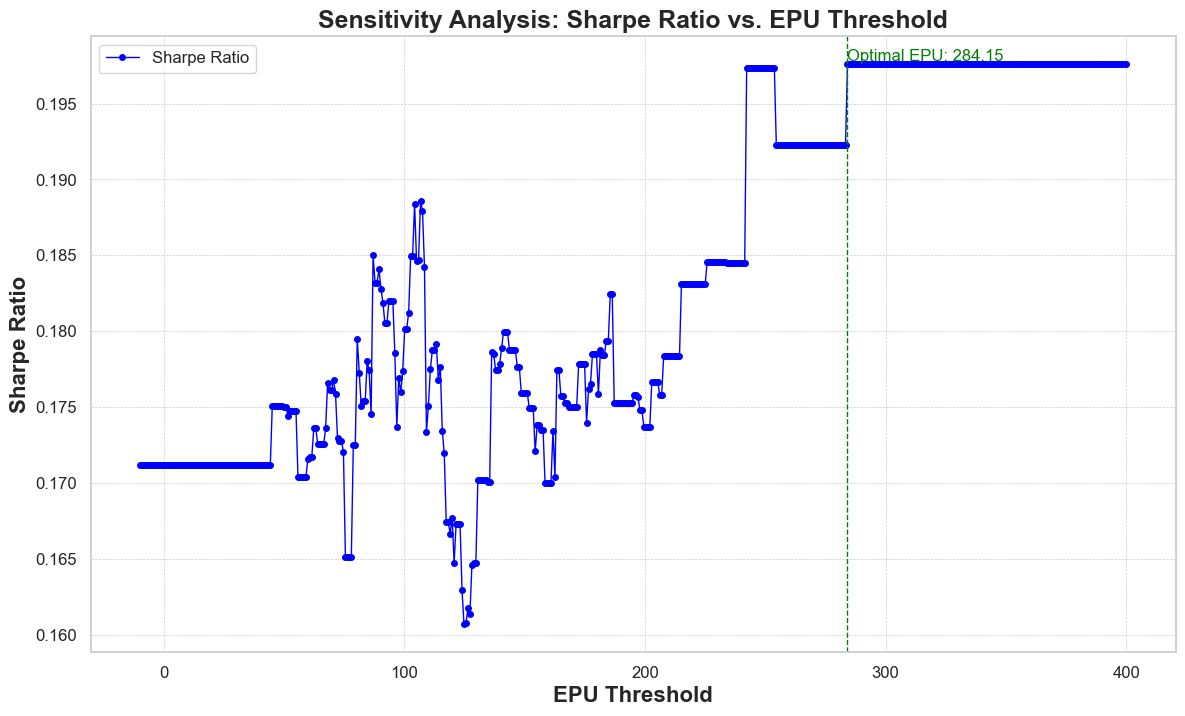

The best threshold for EPU is: 284.15
The final portfolio value using the best threshold is: $340850.15
Final portfolio value if only Large Cap Return was held: $340850.15
Final portfolio value if only Small Cap Return was held: $375133.59
The number of binary signals generated by the trading strategy is: 178
The number of switches between Small Cap and Large Cap returns is: 0
The portfolio was invested in Small Cap returns for 0 periods (0.00% of the time).
The portfolio was invested in Large Cap returns for 178 periods (100.00% of the time).


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    # Calculate the Sharpe ratio
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / excess_returns.std()

def find_optimal_threshold(data, variable_name, initial_investment=100000, threshold_range=(-10, 400), num_thresholds=500):
    # Prepare the data
    data = data.dropna(subset=['Small Cap Return', 'Large Cap Return', variable_name])
    data['Small Cap Return'] = data['Small Cap Return'].ffill()
    data['Large Cap Return'] = data['Large Cap Return'].ffill()
    data[variable_name] = data[variable_name].ffill()

    # Define the range of thresholds to test
    thresholds = np.linspace(min(data[variable_name].min(), threshold_range[0]), max(data[variable_name].max(), threshold_range[1]), num_thresholds)

    # Store Sharpe ratios for each threshold
    sharpe_ratios = []

    # Variables to store the optimal threshold and its Sharpe ratio
    optimal_threshold = None
    max_sharpe_ratio = -np.inf

    # Variables to store the best trade signals and portfolio value
    best_trade_signals = None
    best_portfolio_value = None

    # Perform grid search to find the optimal threshold and calculate Sharpe ratio
    for threshold in thresholds:
        # Generate trade signals based on the previous period's variable value
        data['Trade Signal'] = data[variable_name].shift(1).apply(lambda x: 1 if x > threshold else 0)
        
        # Select returns based on the trade signal, defaulting to Large Cap Return
        data['Selected Return'] = data.apply(
            lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
        
        # Calculate the strategy returns
        data['Strategy Return'] = data['Selected Return']
        
        # Calculate the portfolio value over time
        data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return'] / 100).cumprod()
        
        # Calculate the Sharpe ratio
        sharpe_ratio = calculate_sharpe_ratio(data['Strategy Return'])
        sharpe_ratios.append(sharpe_ratio)
        
        # Check if this is the maximum Sharpe ratio
        if sharpe_ratio > max_sharpe_ratio:
            max_sharpe_ratio = sharpe_ratio
            optimal_threshold = threshold
            best_trade_signals = data['Trade Signal'].copy()
            best_portfolio_value = data['Portfolio Value'].iloc[-1]

    # Set the style of the visualization
    sns.set(style="whitegrid")

    # Plot the sensitivity analysis
    plt.figure(figsize=(14, 8))

    # Plot the Sharpe ratios
    plt.plot(thresholds, sharpe_ratios, label='Sharpe Ratio', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

    # Add a visual cue for the optimal threshold
    plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
    plt.text(optimal_threshold, max(sharpe_ratios), f'Optimal {variable_name}: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

    # Add titles and labels
    plt.title(f'Sensitivity Analysis: Sharpe Ratio vs. {variable_name} Threshold', fontsize=18, fontweight='bold')
    plt.xlabel(f'{variable_name} Threshold', fontsize=16, fontweight='bold')
    plt.ylabel('Sharpe Ratio', fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate the number of binary signals generated
    num_signals = best_trade_signals.count()

    # Calculate the number of switches between Small Cap and Large Cap returns
    num_switches = (best_trade_signals.diff().abs() == 1).sum()

    # Calculate the average composition of the portfolio
    num_small_cap = (best_trade_signals == 1).sum()
    num_large_cap = (best_trade_signals == 0).sum()
    total_periods = len(best_trade_signals)

    # Print the results
    print(f"The best threshold for {variable_name} is: {optimal_threshold:.2f}")
    print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
    print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
    print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
    print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
    print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Example usage:
data = pd.read_csv("Insampletrainingdata.csv")
find_optimal_threshold(data, 'EPU', initial_investment=100000, threshold_range=(-10, 400), num_thresholds=500)


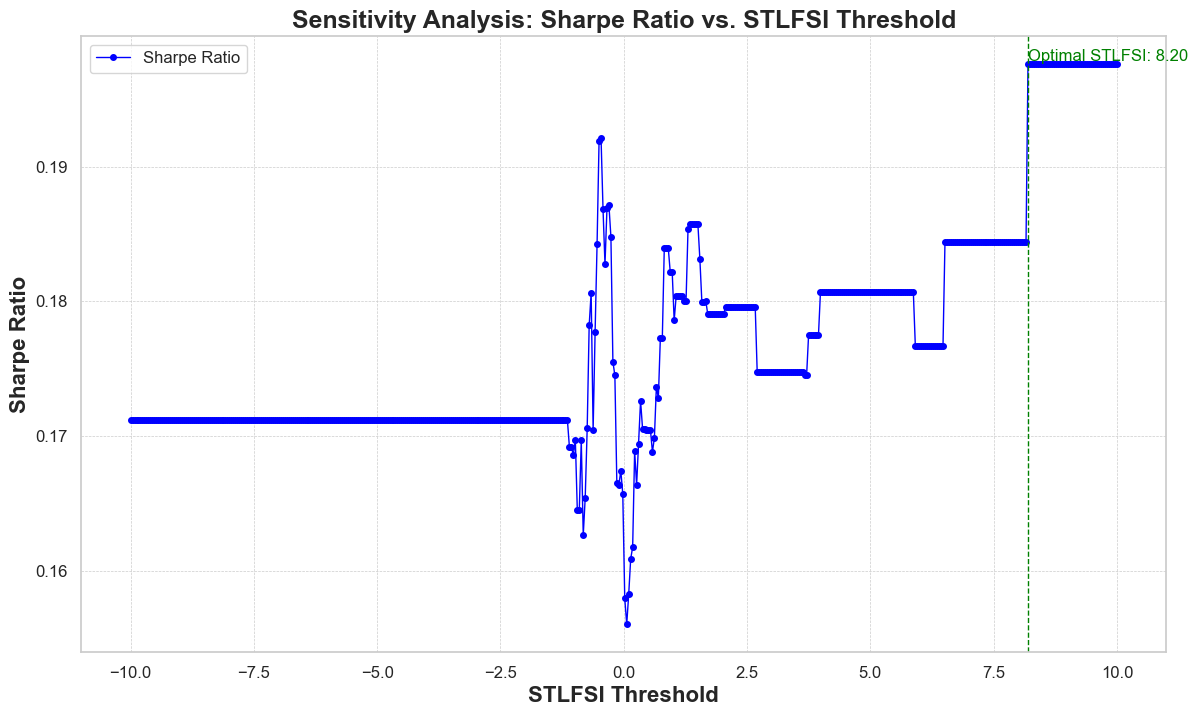

The best threshold for STLFSI is: 8.20
The final portfolio value using the best threshold is: $340850.15
Final portfolio value if only Large Cap Return was held: $340850.15
Final portfolio value if only Small Cap Return was held: $375133.59
The number of binary signals generated by the trading strategy is: 178
The number of switches between Small Cap and Large Cap returns is: 0
The portfolio was invested in Small Cap returns for 0 periods (0.00% of the time).
The portfolio was invested in Large Cap returns for 178 periods (100.00% of the time).


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    # Calculate the Sharpe ratio
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / excess_returns.std()

def find_optimal_threshold(data, variable_name, initial_investment=100000, threshold_range=(-10, 10), num_thresholds=500):
    # Prepare the data
    data = data.dropna(subset=['Small Cap Return', 'Large Cap Return', variable_name])
    data['Small Cap Return'] = data['Small Cap Return'].ffill()
    data['Large Cap Return'] = data['Large Cap Return'].ffill()
    data[variable_name] = data[variable_name].ffill()

    # Define the range of thresholds to test
    thresholds = np.linspace(min(data[variable_name].min(), threshold_range[0]), max(data[variable_name].max(), threshold_range[1]), num_thresholds)

    # Store Sharpe ratios for each threshold
    sharpe_ratios = []

    # Variables to store the optimal threshold and its Sharpe ratio
    optimal_threshold = None
    max_sharpe_ratio = -np.inf

    # Variables to store the best trade signals and portfolio value
    best_trade_signals = None
    best_portfolio_value = None

    # Perform grid search to find the optimal threshold and calculate Sharpe ratio
    for threshold in thresholds:
        # Generate trade signals based on the previous period's variable value
        data['Trade Signal'] = data[variable_name].shift(1).apply(lambda x: 1 if x > threshold else 0)
        
        # Select returns based on the trade signal, defaulting to Large Cap Return
        data['Selected Return'] = data.apply(
            lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
        
        # Calculate the strategy returns
        data['Strategy Return'] = data['Selected Return']
        
        # Calculate the portfolio value over time
        data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return'] / 100).cumprod()
        
        # Calculate the Sharpe ratio
        sharpe_ratio = calculate_sharpe_ratio(data['Strategy Return'])
        sharpe_ratios.append(sharpe_ratio)
        
        # Check if this is the maximum Sharpe ratio
        if sharpe_ratio > max_sharpe_ratio:
            max_sharpe_ratio = sharpe_ratio
            optimal_threshold = threshold
            best_trade_signals = data['Trade Signal'].copy()
            best_portfolio_value = data['Portfolio Value'].iloc[-1]

    # Set the style of the visualization
    sns.set(style="whitegrid")

    # Plot the sensitivity analysis
    plt.figure(figsize=(14, 8))

    # Plot the Sharpe ratios
    plt.plot(thresholds, sharpe_ratios, label='Sharpe Ratio', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

    # Add a visual cue for the optimal threshold
    plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
    plt.text(optimal_threshold, max(sharpe_ratios), f'Optimal {variable_name}: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

    # Add titles and labels
    plt.title(f'Sensitivity Analysis: Sharpe Ratio vs. {variable_name} Threshold', fontsize=18, fontweight='bold')
    plt.xlabel(f'{variable_name} Threshold', fontsize=16, fontweight='bold')
    plt.ylabel('Sharpe Ratio', fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate the number of binary signals generated
    num_signals = best_trade_signals.count()

    # Calculate the number of switches between Small Cap and Large Cap returns
    num_switches = (best_trade_signals.diff().abs() == 1).sum()

    # Calculate the average composition of the portfolio
    num_small_cap = (best_trade_signals == 1).sum()
    num_large_cap = (best_trade_signals == 0).sum()
    total_periods = len(best_trade_signals)

    # Print the results
    print(f"The best threshold for {variable_name} is: {optimal_threshold:.2f}")
    print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
    print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
    print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
    print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
    print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Example usage:
data = pd.read_csv("Insampletrainingdata.csv")
find_optimal_threshold(data, 'STLFSI', initial_investment=100000, threshold_range=(-10, 10), num_thresholds=500)


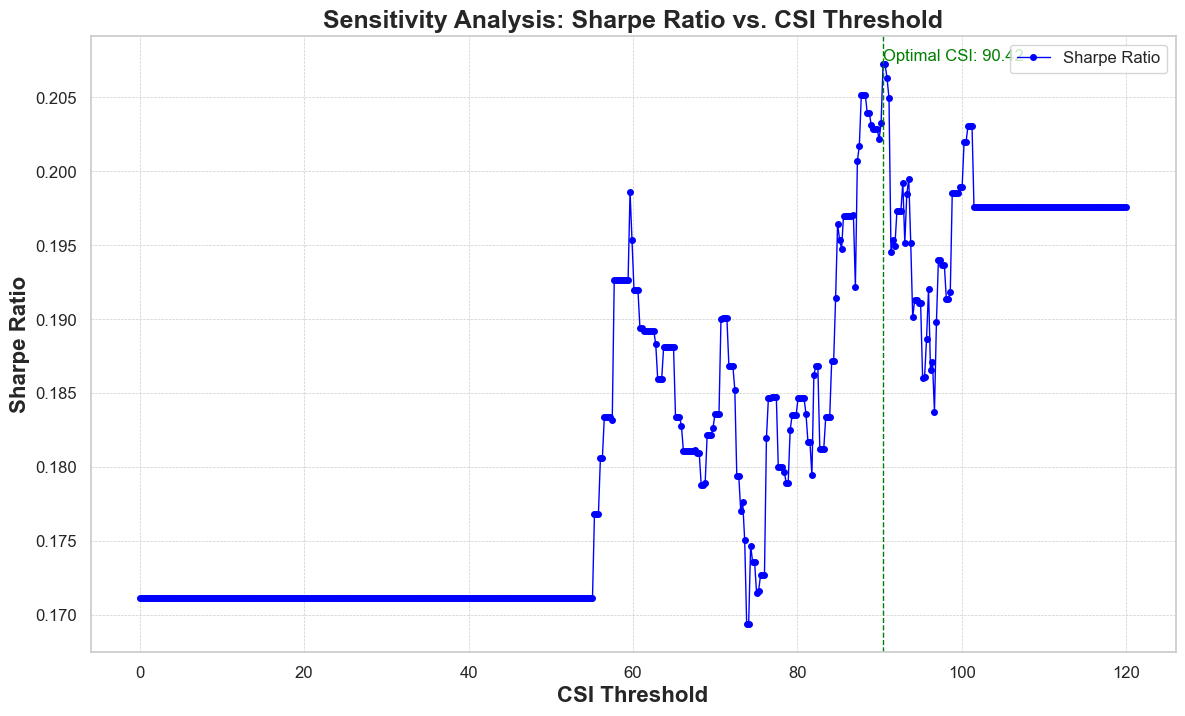

The best threshold for CSI is: 90.42
The final portfolio value using the best threshold is: $394440.79
Final portfolio value if only Large Cap Return was held: $340850.15
Final portfolio value if only Small Cap Return was held: $375133.59
The number of binary signals generated by the trading strategy is: 178
The number of switches between Small Cap and Large Cap returns is: 19
The portfolio was invested in Small Cap returns for 63 periods (35.39% of the time).
The portfolio was invested in Large Cap returns for 115 periods (64.61% of the time).


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    # Calculate the Sharpe ratio
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / excess_returns.std()

def find_optimal_threshold(data, variable_name, initial_investment=100000, threshold_range=(0, 120), num_thresholds=500):
    # Prepare the data
    data = data.dropna(subset=['Small Cap Return', 'Large Cap Return', variable_name])
    data['Small Cap Return'] = data['Small Cap Return'].ffill()
    data['Large Cap Return'] = data['Large Cap Return'].ffill()
    data[variable_name] = data[variable_name].ffill()

    # Define the range of thresholds to test
    thresholds = np.linspace(min(data[variable_name].min(), threshold_range[0]), max(data[variable_name].max(), threshold_range[1]), num_thresholds)

    # Store Sharpe ratios for each threshold
    sharpe_ratios = []

    # Variables to store the optimal threshold and its Sharpe ratio
    optimal_threshold = None
    max_sharpe_ratio = -np.inf

    # Variables to store the best trade signals and portfolio value
    best_trade_signals = None
    best_portfolio_value = None

    # Perform grid search to find the optimal threshold and calculate Sharpe ratio
    for threshold in thresholds:
        # Generate trade signals based on the previous period's variable value
        data['Trade Signal'] = data[variable_name].shift(1).apply(lambda x: 1 if x > threshold else 0)
        
        # Select returns based on the trade signal, defaulting to Large Cap Return
        data['Selected Return'] = data.apply(
            lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
        
        # Calculate the strategy returns
        data['Strategy Return'] = data['Selected Return']
        
        # Calculate the portfolio value over time
        data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return'] / 100).cumprod()
        
        # Calculate the Sharpe ratio
        sharpe_ratio = calculate_sharpe_ratio(data['Strategy Return'])
        sharpe_ratios.append(sharpe_ratio)
        
        # Check if this is the maximum Sharpe ratio
        if sharpe_ratio > max_sharpe_ratio:
            max_sharpe_ratio = sharpe_ratio
            optimal_threshold = threshold
            best_trade_signals = data['Trade Signal'].copy()
            best_portfolio_value = data['Portfolio Value'].iloc[-1]

    # Set the style of the visualization
    sns.set(style="whitegrid")

    # Plot the sensitivity analysis
    plt.figure(figsize=(14, 8))

    # Plot the Sharpe ratios
    plt.plot(thresholds, sharpe_ratios, label='Sharpe Ratio', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

    # Add a visual cue for the optimal threshold
    plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
    plt.text(optimal_threshold, max(sharpe_ratios), f'Optimal {variable_name}: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

    # Add titles and labels
    plt.title(f'Sensitivity Analysis: Sharpe Ratio vs. {variable_name} Threshold', fontsize=18, fontweight='bold')
    plt.xlabel(f'{variable_name} Threshold', fontsize=16, fontweight='bold')
    plt.ylabel('Sharpe Ratio', fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate the number of binary signals generated
    num_signals = best_trade_signals.count()

    # Calculate the number of switches between Small Cap and Large Cap returns
    num_switches = (best_trade_signals.diff().abs() == 1).sum()

    # Calculate the average composition of the portfolio
    num_small_cap = (best_trade_signals == 1).sum()
    num_large_cap = (best_trade_signals == 0).sum()
    total_periods = len(best_trade_signals)

    # Print the results
    print(f"The best threshold for {variable_name} is: {optimal_threshold:.2f}")
    print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
    print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
    print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
    print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
    print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Example usage:
data = pd.read_csv("Insampletrainingdata.csv")
find_optimal_threshold(data, 'CSI', initial_investment=100000, threshold_range=(0, 120), num_thresholds=500)


C:\Users\LukaDelic\AppData\Local\Temp\ipykernel_1688\1606376289.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Small Cap Return'] = data['Small Cap Return'].ffill()
C:\Users\LukaDelic\AppData\Local\Temp\ipykernel_1688\1606376289.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Large Cap Return'] = data['Large Cap Return'].ffill()
C:\Users\LukaDelic\AppData\Local\Temp\ipykernel_1688\1606376289.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

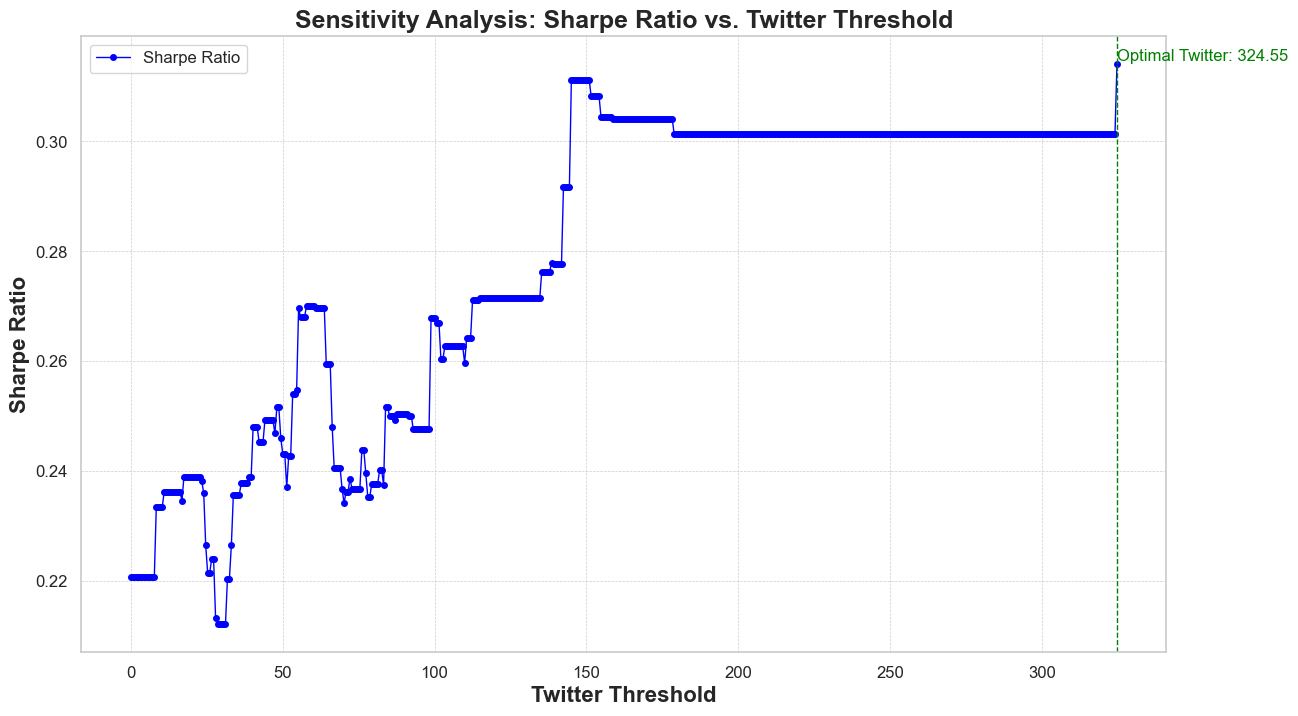

The best threshold for Twitter is: 324.55
The final portfolio value using the best threshold is: $236899.48
Final portfolio value if only Large Cap Return was held: $236899.48
Final portfolio value if only Small Cap Return was held: $209852.10
The number of binary signals generated by the trading strategy is: 90
The number of switches between Small Cap and Large Cap returns is: 0
The portfolio was invested in Small Cap returns for 0 periods (0.00% of the time).
The portfolio was invested in Large Cap returns for 90 periods (100.00% of the time).


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    # Calculate the Sharpe ratio
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / excess_returns.std()

def find_optimal_threshold(data, variable_name, initial_investment=100000, threshold_range=(0, 200), num_thresholds=500):
    # Prepare the data
    data = data.dropna(subset=['Small Cap Return', 'Large Cap Return', variable_name])
    data['Small Cap Return'] = data['Small Cap Return'].ffill()
    data['Large Cap Return'] = data['Large Cap Return'].ffill()
    data[variable_name] = data[variable_name].ffill()

    # Define the range of thresholds to test
    thresholds = np.linspace(min(data[variable_name].min(), threshold_range[0]), max(data[variable_name].max(), threshold_range[1]), num_thresholds)

    # Store Sharpe ratios for each threshold
    sharpe_ratios = []

    # Variables to store the optimal threshold and its Sharpe ratio
    optimal_threshold = None
    max_sharpe_ratio = -np.inf

    # Variables to store the best trade signals and portfolio value
    best_trade_signals = None
    best_portfolio_value = None

    # Perform grid search to find the optimal threshold and calculate Sharpe ratio
    for threshold in thresholds:
        # Generate trade signals based on the previous period's variable value
        data['Trade Signal'] = data[variable_name].shift(1).apply(lambda x: 1 if x > threshold else 0)
        
        # Select returns based on the trade signal, defaulting to Large Cap Return
        data['Selected Return'] = data.apply(
            lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
        
        # Calculate the strategy returns
        data['Strategy Return'] = data['Selected Return']
        
        # Calculate the portfolio value over time
        data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return'] / 100).cumprod()
        
        # Calculate the Sharpe ratio
        sharpe_ratio = calculate_sharpe_ratio(data['Strategy Return'])
        sharpe_ratios.append(sharpe_ratio)
        
        # Check if this is the maximum Sharpe ratio
        if sharpe_ratio > max_sharpe_ratio:
            max_sharpe_ratio = sharpe_ratio
            optimal_threshold = threshold
            best_trade_signals = data['Trade Signal'].copy()
            best_portfolio_value = data['Portfolio Value'].iloc[-1]

    # Set the style of the visualization
    sns.set(style="whitegrid")

    # Plot the sensitivity analysis
    plt.figure(figsize=(14, 8))

    # Plot the Sharpe ratios
    plt.plot(thresholds, sharpe_ratios, label='Sharpe Ratio', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

    # Add a visual cue for the optimal threshold
    plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
    plt.text(optimal_threshold, max(sharpe_ratios), f'Optimal {variable_name}: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

    # Add titles and labels
    plt.title(f'Sensitivity Analysis: Sharpe Ratio vs. {variable_name} Threshold', fontsize=18, fontweight='bold')
    plt.xlabel(f'{variable_name} Threshold', fontsize=16, fontweight='bold')
    plt.ylabel('Sharpe Ratio', fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate the number of binary signals generated
    num_signals = best_trade_signals.count()

    # Calculate the number of switches between Small Cap and Large Cap returns
    num_switches = (best_trade_signals.diff().abs() == 1).sum()

    # Calculate the average composition of the portfolio
    num_small_cap = (best_trade_signals == 1).sum()
    num_large_cap = (best_trade_signals == 0).sum()
    total_periods = len(best_trade_signals)

    # Print the results
    print(f"The best threshold for {variable_name} is: {optimal_threshold:.2f}")
    print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
    print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
    print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
    print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
    print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Example usage:
data = pd.read_csv("Insampletrainingdata.csv")
find_optimal_threshold(data, 'Twitter', initial_investment=100000, threshold_range=(0, 200), num_thresholds=500)


C:\Users\LukaDelic\AppData\Local\Temp\ipykernel_1688\371244414.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Small Cap Return'] = data['Small Cap Return'].ffill()
C:\Users\LukaDelic\AppData\Local\Temp\ipykernel_1688\371244414.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Large Cap Return'] = data['Large Cap Return'].ffill()
C:\Users\LukaDelic\AppData\Local\Temp\ipykernel_1688\371244414.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

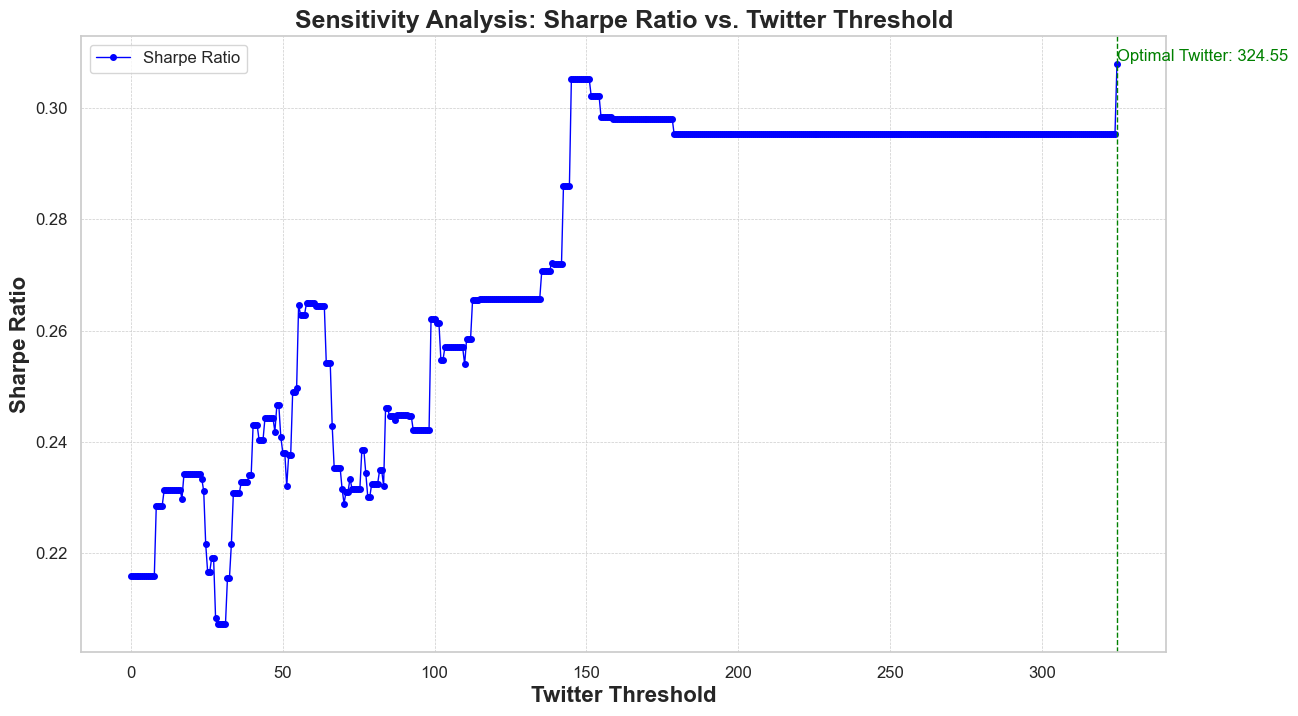

The best threshold for Twitter is: 324.55
The final portfolio value using the best threshold is: $236899.48
Final portfolio value if only Large Cap Return was held: $236899.48
Final portfolio value if only Small Cap Return was held: $209852.10
The number of binary signals generated by the trading strategy is: 90
The number of switches between Small Cap and Large Cap returns is: 0
The portfolio was invested in Small Cap returns for 0 periods (0.00% of the time).
The portfolio was invested in Large Cap returns for 90 periods (100.00% of the time).


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_sharpe_ratio(returns, risk_free_rate=0.02):
    # Calculate the Sharpe ratio
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / excess_returns.std()

def find_optimal_threshold(data, variable_name, initial_investment=100000, threshold_range=(0, 200), num_thresholds=500):
    # Prepare the data
    data = data.dropna(subset=['Small Cap Return', 'Large Cap Return', variable_name])
    data['Small Cap Return'] = data['Small Cap Return'].ffill()
    data['Large Cap Return'] = data['Large Cap Return'].ffill()
    data[variable_name] = data[variable_name].ffill()

    # Define the range of thresholds to test
    thresholds = np.linspace(min(data[variable_name].min(), threshold_range[0]), max(data[variable_name].max(), threshold_range[1]), num_thresholds)

    # Store Sharpe ratios for each threshold
    sharpe_ratios = []

    # Variables to store the optimal threshold and its Sharpe ratio
    optimal_threshold = None
    max_sharpe_ratio = -np.inf

    # Variables to store the best trade signals and portfolio value
    best_trade_signals = None
    best_portfolio_value = None

    # Perform grid search to find the optimal threshold and calculate Sharpe ratio
    for threshold in thresholds:
        # Generate trade signals based on the previous period's variable value
        data['Trade Signal'] = data[variable_name].shift(1).apply(lambda x: 1 if x > threshold else 0)
        
        # Select returns based on the trade signal, defaulting to Large Cap Return
        data['Selected Return'] = data.apply(
            lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
        
        # Calculate the strategy returns
        data['Strategy Return'] = data['Selected Return']
        
        # Calculate the portfolio value over time
        data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return'] / 100).cumprod()
        
        # Calculate the Sharpe ratio
        sharpe_ratio = calculate_sharpe_ratio(data['Strategy Return'])
        sharpe_ratios.append(sharpe_ratio)
        
        # Check if this is the maximum Sharpe ratio
        if sharpe_ratio > max_sharpe_ratio:
            max_sharpe_ratio = sharpe_ratio
            optimal_threshold = threshold
            best_trade_signals = data['Trade Signal'].copy()
            best_portfolio_value = data['Portfolio Value'].iloc[-1]

    # Set the style of the visualization
    sns.set(style="whitegrid")

    # Plot the sensitivity analysis
    plt.figure(figsize=(14, 8))

    # Plot the Sharpe ratios
    plt.plot(thresholds, sharpe_ratios, label='Sharpe Ratio', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

    # Add a visual cue for the optimal threshold
    plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
    plt.text(optimal_threshold, max(sharpe_ratios), f'Optimal {variable_name}: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

    # Add titles and labels
    plt.title(f'Sensitivity Analysis: Sharpe Ratio vs. {variable_name} Threshold', fontsize=18, fontweight='bold')
    plt.xlabel(f'{variable_name} Threshold', fontsize=16, fontweight='bold')
    plt.ylabel('Sharpe Ratio', fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate the number of binary signals generated
    num_signals = best_trade_signals.count()

    # Calculate the number of switches between Small Cap and Large Cap returns
    num_switches = (best_trade_signals.diff().abs() == 1).sum()

    # Calculate the average composition of the portfolio
    num_small_cap = (best_trade_signals == 1).sum()
    num_large_cap = (best_trade_signals == 0).sum()
    total_periods = len(best_trade_signals)

    # Print the results
    print(f"The best threshold for {variable_name} is: {optimal_threshold:.2f}")
    print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
    print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
    print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
    print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
    print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Example usage:
data = pd.read_csv("Insampletrainingdata.csv")
find_optimal_threshold(data, 'Twitter', initial_investment=100000, threshold_range=(0, 200), num_thresholds=500)


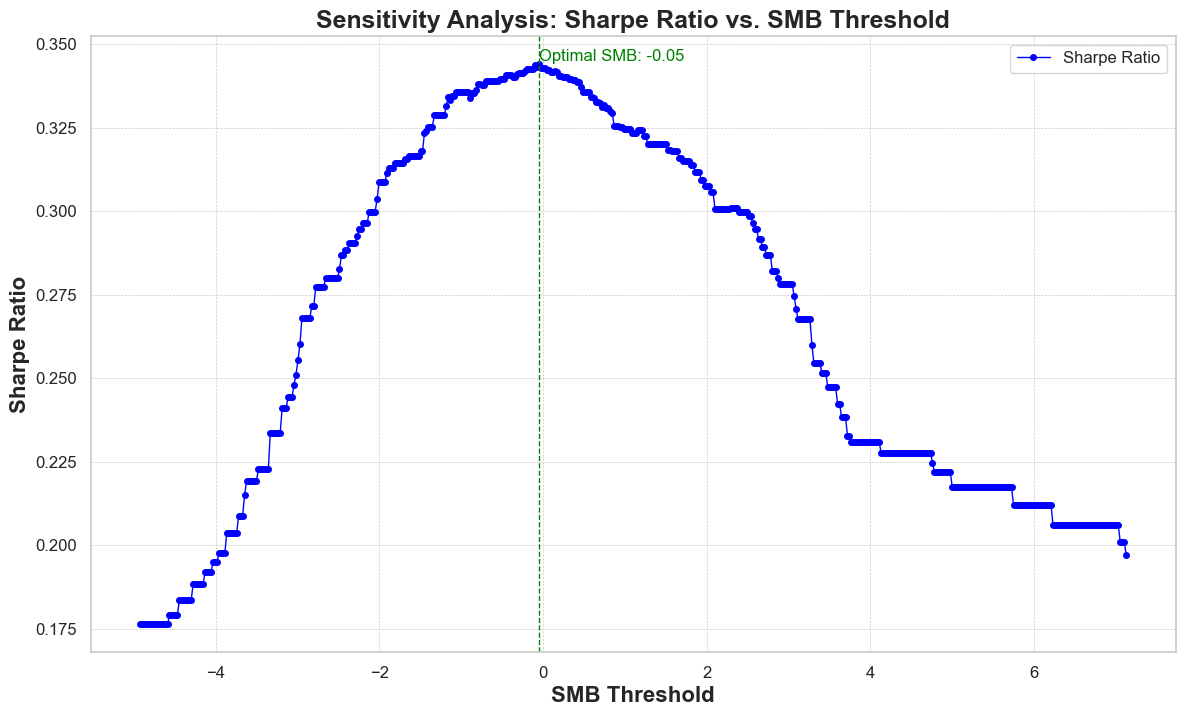

The best threshold for SMB is: -0.05
The final portfolio value using the best threshold is: $1309619.92
Final portfolio value if only Large Cap Return was held: $340850.15
Final portfolio value if only Small Cap Return was held: $375133.59
The number of binary signals generated by the trading strategy is: 178
The number of switches between Small Cap and Large Cap returns is: 100
The portfolio was invested in Small Cap returns for 92 periods (51.69% of the time).
The portfolio was invested in Large Cap returns for 86 periods (48.31% of the time).


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_sharpe_ratio(returns, risk_free_rate=0.02):
    # Calculate the Sharpe ratio
    excess_returns = returns - risk_free_rate / 12  # Convert annual risk-free rate to monthly
    return excess_returns.mean() / excess_returns.std()

def find_optimal_threshold(data, variable_name, initial_investment=100000, threshold_range=(-1, 1), num_thresholds=500):
    # Prepare the data
    data = data.dropna(subset=['Small Cap Return', 'Large Cap Return', variable_name])
    data['Small Cap Return'] = data['Small Cap Return'].ffill()
    data['Large Cap Return'] = data['Large Cap Return'].ffill()
    data[variable_name] = data[variable_name].ffill()

    # Define the range of thresholds to test
    thresholds = np.linspace(min(data[variable_name].min(), threshold_range[0]), max(data[variable_name].max(), threshold_range[1]), num_thresholds)

    # Store Sharpe ratios for each threshold
    sharpe_ratios = []

    # Variables to store the optimal threshold and its Sharpe ratio
    optimal_threshold = None
    max_sharpe_ratio = -np.inf

    # Variables to store the best trade signals and portfolio value
    best_trade_signals = None
    best_portfolio_value = None

    # Perform grid search to find the optimal threshold and calculate Sharpe ratio
    for threshold in thresholds:
        # Generate trade signals based on the previous period's variable value
        data['Trade Signal'] = data[variable_name].shift(1).apply(lambda x: 1 if x > threshold else 0)
        
        # Select returns based on the trade signal, defaulting to Large Cap Return
        data['Selected Return'] = data.apply(
            lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
        
        # Calculate the strategy returns
        data['Strategy Return'] = data['Selected Return']
        
        # Calculate the portfolio value over time
        data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return'] / 100).cumprod()
        
        # Calculate the Sharpe ratio
        sharpe_ratio = calculate_sharpe_ratio(data['Strategy Return'])
        sharpe_ratios.append(sharpe_ratio)
        
        # Check if this is the maximum Sharpe ratio
        if sharpe_ratio > max_sharpe_ratio:
            max_sharpe_ratio = sharpe_ratio
            optimal_threshold = threshold
            best_trade_signals = data['Trade Signal'].copy()
            best_portfolio_value = data['Portfolio Value'].iloc[-1]

    # Set the style of the visualization
    sns.set(style="whitegrid")

    # Plot the sensitivity analysis
    plt.figure(figsize=(14, 8))

    # Plot the Sharpe ratios
    plt.plot(thresholds, sharpe_ratios, label='Sharpe Ratio', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

    # Add a visual cue for the optimal threshold
    plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
    plt.text(optimal_threshold, max(sharpe_ratios), f'Optimal {variable_name}: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

    # Add titles and labels
    plt.title(f'Sensitivity Analysis: Sharpe Ratio vs. {variable_name} Threshold', fontsize=18, fontweight='bold')
    plt.xlabel(f'{variable_name} Threshold', fontsize=16, fontweight='bold')
    plt.ylabel('Sharpe Ratio', fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate the number of binary signals generated
    num_signals = best_trade_signals.count()

    # Calculate the number of switches between Small Cap and Large Cap returns
    num_switches = (best_trade_signals.diff().abs() == 1).sum()

    # Calculate the average composition of the portfolio
    num_small_cap = (best_trade_signals == 1).sum()
    num_large_cap = (best_trade_signals == 0).sum()
    total_periods = len(best_trade_signals)

    # Print the results
    print(f"The best threshold for {variable_name} is: {optimal_threshold:.2f}")
    print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
    print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
    print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
    print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
    print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Example usage:
data = pd.read_csv("Insampletrainingdata.csv")
find_optimal_threshold(data, 'SMB', initial_investment=100000, threshold_range=(-1, 1), num_thresholds=500)


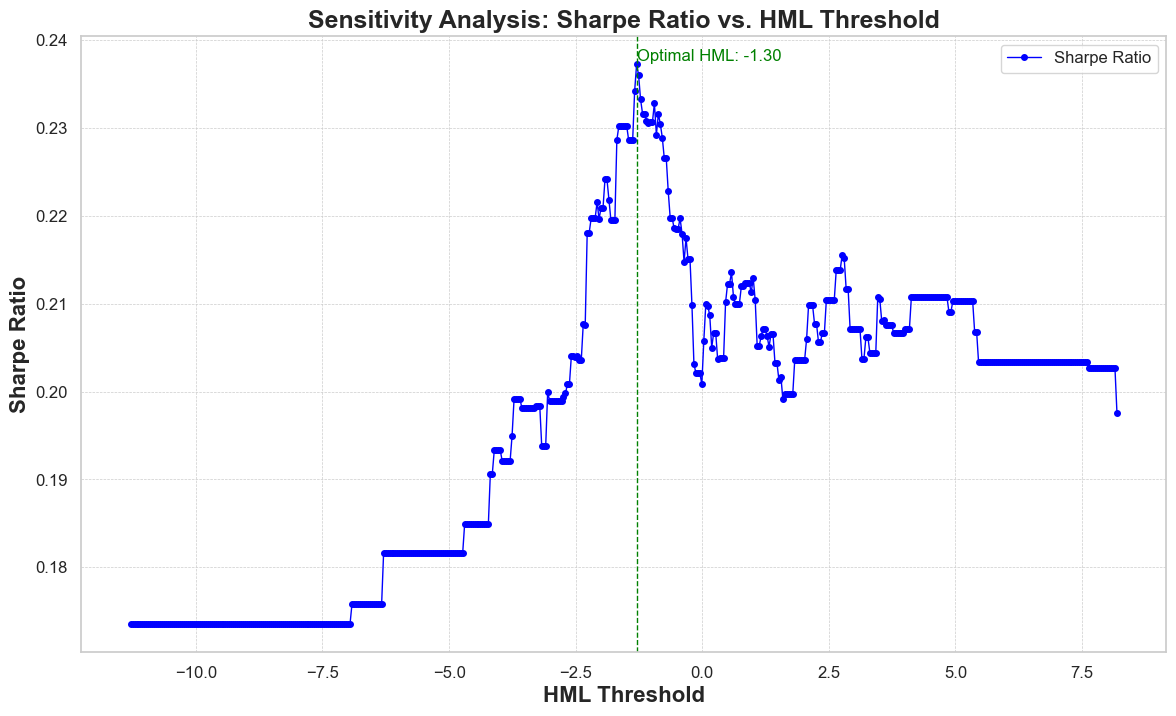

The best threshold for HML is: -1.30
The final portfolio value using the best threshold is: $588433.41
Final portfolio value if only Large Cap Return was held: $340850.15
Final portfolio value if only Small Cap Return was held: $375133.59
The number of binary signals generated by the trading strategy is: 178
The number of switches between Small Cap and Large Cap returns is: 51
The portfolio was invested in Small Cap returns for 130 periods (73.03% of the time).
The portfolio was invested in Large Cap returns for 48 periods (26.97% of the time).


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    # Calculate the Sharpe ratio
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / excess_returns.std()

def find_optimal_threshold(data, variable_name, initial_investment=100000, threshold_range=(-2, 2), num_thresholds=500):
    # Prepare the data
    data = data.dropna(subset=['Small Cap Return', 'Large Cap Return', variable_name])
    data['Small Cap Return'] = data['Small Cap Return'].ffill()
    data['Large Cap Return'] = data['Large Cap Return'].ffill()
    data[variable_name] = data[variable_name].ffill()

    # Define the range of thresholds to test
    thresholds = np.linspace(min(data[variable_name].min(), threshold_range[0]), max(data[variable_name].max(), threshold_range[1]), num_thresholds)

    # Store Sharpe ratios for each threshold
    sharpe_ratios = []

    # Variables to store the optimal threshold and its Sharpe ratio
    optimal_threshold = None
    max_sharpe_ratio = -np.inf

    # Variables to store the best trade signals and portfolio value
    best_trade_signals = None
    best_portfolio_value = None

    # Perform grid search to find the optimal threshold and calculate Sharpe ratio
    for threshold in thresholds:
        # Generate trade signals based on the previous period's variable value
        data['Trade Signal'] = data[variable_name].shift(1).apply(lambda x: 1 if x > threshold else 0)
        
        # Select returns based on the trade signal, defaulting to Large Cap Return
        data['Selected Return'] = data.apply(
            lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
        
        # Calculate the strategy returns
        data['Strategy Return'] = data['Selected Return']
        
        # Calculate the portfolio value over time
        data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return'] / 100).cumprod()
        
        # Calculate the Sharpe ratio
        sharpe_ratio = calculate_sharpe_ratio(data['Strategy Return'])
        sharpe_ratios.append(sharpe_ratio)
        
        # Check if this is the maximum Sharpe ratio
        if sharpe_ratio > max_sharpe_ratio:
            max_sharpe_ratio = sharpe_ratio
            optimal_threshold = threshold
            best_trade_signals = data['Trade Signal'].copy()
            best_portfolio_value = data['Portfolio Value'].iloc[-1]

    # Set the style of the visualization
    sns.set(style="whitegrid")

    # Plot the sensitivity analysis
    plt.figure(figsize=(14, 8))

    # Plot the Sharpe ratios
    plt.plot(thresholds, sharpe_ratios, label='Sharpe Ratio', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

    # Add a visual cue for the optimal threshold
    plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
    plt.text(optimal_threshold, max(sharpe_ratios), f'Optimal {variable_name}: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

    # Add titles and labels
    plt.title(f'Sensitivity Analysis: Sharpe Ratio vs. {variable_name} Threshold', fontsize=18, fontweight='bold')
    plt.xlabel(f'{variable_name} Threshold', fontsize=16, fontweight='bold')
    plt.ylabel('Sharpe Ratio', fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate the number of binary signals generated
    num_signals = best_trade_signals.count()

    # Calculate the number of switches between Small Cap and Large Cap returns
    num_switches = (best_trade_signals.diff().abs() == 1).sum()

    # Calculate the average composition of the portfolio
    num_small_cap = (best_trade_signals == 1).sum()
    num_large_cap = (best_trade_signals == 0).sum()
    total_periods = len(best_trade_signals)

    # Print the results
    print(f"The best threshold for {variable_name} is: {optimal_threshold:.2f}")
    print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
    print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
    print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
    print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
    print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Example usage:
data = pd.read_csv("Insampletrainingdata.csv")
find_optimal_threshold(data, 'HML', initial_investment=100000, threshold_range=(-2, 2), num_thresholds=500)


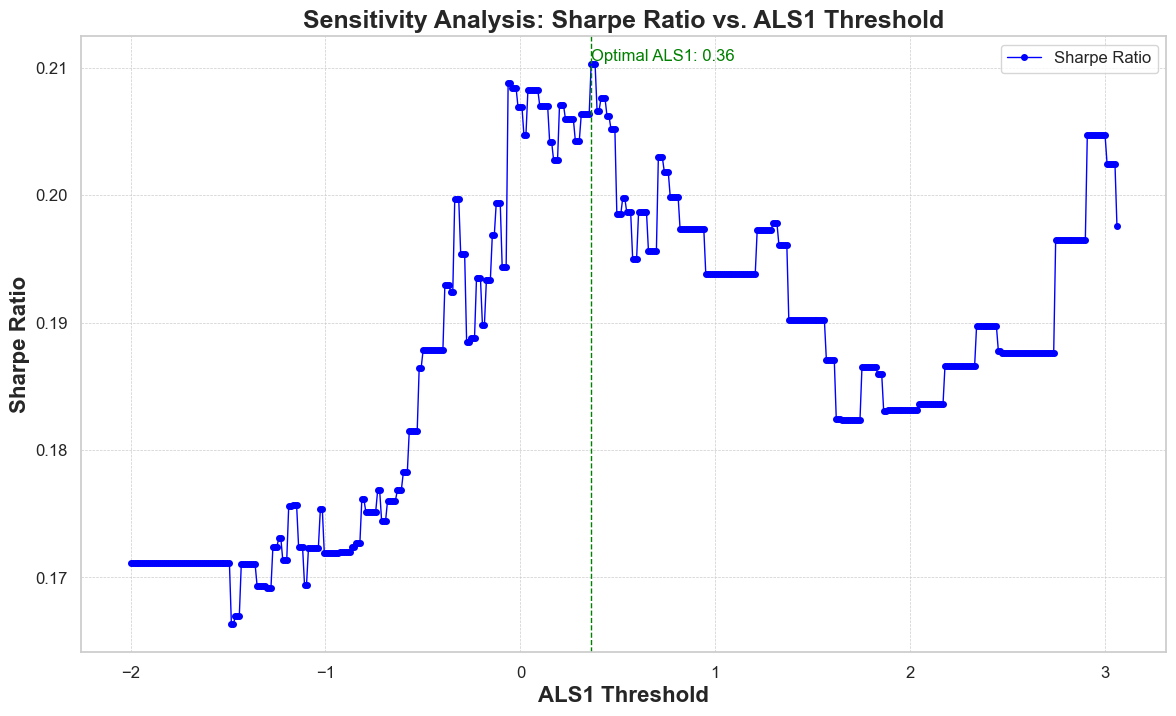

The best threshold for ALS1 is: 0.36
The final portfolio value using the best threshold is: $456596.17
Final portfolio value if only Large Cap Return was held: $340850.15
Final portfolio value if only Small Cap Return was held: $375133.59
The number of binary signals generated by the trading strategy is: 178
The number of switches between Small Cap and Large Cap returns is: 10
The portfolio was invested in Small Cap returns for 49 periods (27.53% of the time).
The portfolio was invested in Large Cap returns for 129 periods (72.47% of the time).
The Sharpe ratio of the portfolio is: 0.21
The annualized return of the portfolio is: 10.67%


In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Insampletrainingdata.csv")

# Standardize the ALS1 data
scaler = StandardScaler()
data['ALS1'] = scaler.fit_transform(data[['ALS1']])

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    # Calculate the Sharpe ratio
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / returns.std()

def calculate_annualized_return(portfolio_value, num_periods, periods_per_year=12):
    # Calculate the annualized return
    total_return = portfolio_value.iloc[-1] / portfolio_value.iloc[0] - 1
    annualized_return = (1 + total_return) ** (periods_per_year / num_periods) - 1
    return annualized_return

def find_optimal_threshold(data, variable_name, initial_investment=100000, threshold_range=(-2, 2), num_thresholds=500):
    data = data.dropna(subset=['Small Cap Return', 'Large Cap Return', variable_name])
    data['Small Cap Return'] = data['Small Cap Return'].ffill()
    data['Large Cap Return'] = data['Large Cap Return'].ffill()
    data[variable_name] = data[variable_name].ffill()

    thresholds = np.linspace(min(data[variable_name].min(), threshold_range[0]), max(data[variable_name].max(), threshold_range[1]), num_thresholds)
    sharpe_ratios = []
    annualized_returns = []
    optimal_threshold = None
    max_sharpe_ratio = -np.inf
    best_trade_signals = None
    best_portfolio_value = None
    best_annualized_return = None

    for threshold in thresholds:
        data['Trade Signal'] = data[variable_name].shift(1).apply(lambda x: 1 if x > threshold else 0)
        data['Selected Return'] = data.apply(lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
        data['Strategy Return'] = data['Selected Return']
        data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return'] / 100).cumprod()
        sharpe_ratio = calculate_sharpe_ratio(data['Strategy Return'])
        annualized_return = calculate_annualized_return(data['Portfolio Value'], len(data))
        sharpe_ratios.append(sharpe_ratio)
        annualized_returns.append(annualized_return)

        if sharpe_ratio > max_sharpe_ratio:
            max_sharpe_ratio = sharpe_ratio
            optimal_threshold = threshold
            best_trade_signals = data['Trade Signal'].copy()
            best_portfolio_value = data['Portfolio Value'].iloc[-1]
            best_annualized_return = annualized_return

    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))
    plt.plot(thresholds, sharpe_ratios, label='Sharpe Ratio', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)
    plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
    plt.text(optimal_threshold, max(sharpe_ratios), f'Optimal {variable_name}: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')
    plt.title(f'Sensitivity Analysis: Sharpe Ratio vs. {variable_name} Threshold', fontsize=18, fontweight='bold')
    plt.xlabel(f'{variable_name} Threshold', fontsize=16, fontweight='bold')
    plt.ylabel('Sharpe Ratio', fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    num_signals = best_trade_signals.count()
    num_switches = (best_trade_signals.diff().abs() == 1).sum()
    num_small_cap = (best_trade_signals == 1).sum()
    num_large_cap = (best_trade_signals == 0).sum()
    total_periods = len(best_trade_signals)

    print(f"The best threshold for {variable_name} is: {optimal_threshold:.2f}")
    print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
    print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
    print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
    print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
    print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")
    print(f"The Sharpe ratio of the portfolio is: {max_sharpe_ratio:.2f}")
    print(f"The annualized return of the portfolio is: {best_annualized_return:.2%}")

    return optimal_threshold

# Find the optimal threshold for ALS1
optimal_threshold_als1 = find_optimal_threshold(data, 'ALS1')


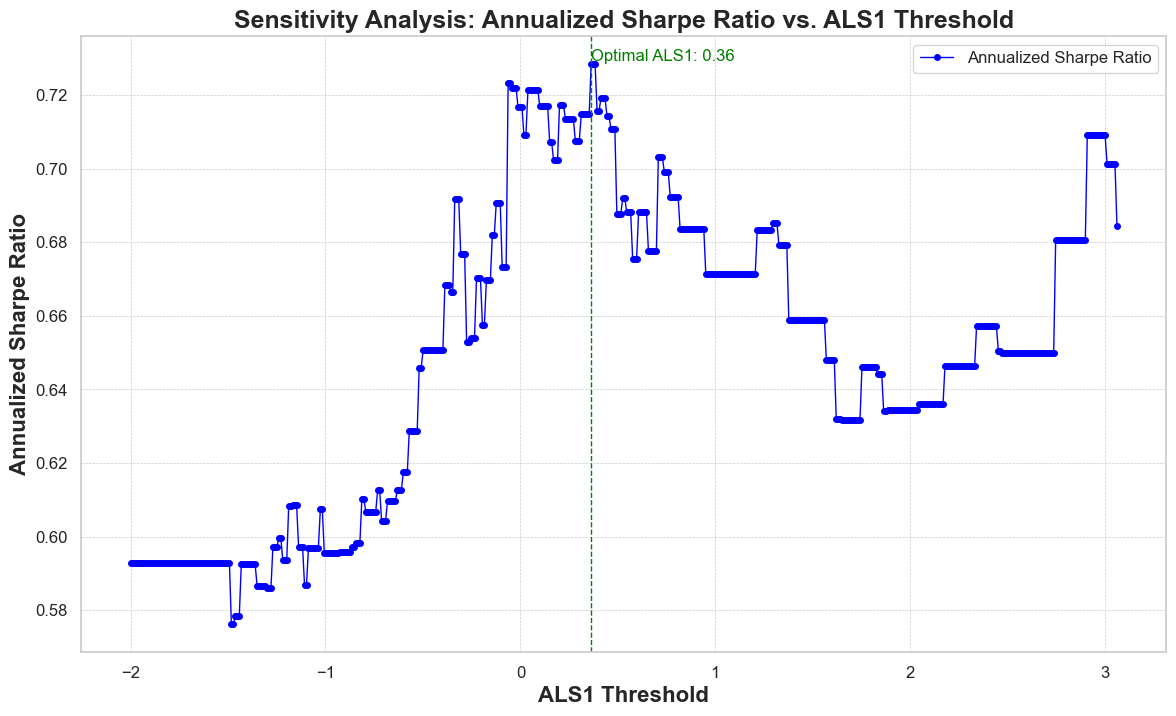

The best threshold for ALS1 is: 0.36
The final portfolio value using the best threshold is: $456596.17
Final portfolio value if only Large Cap Return was held: $340850.15
Final portfolio value if only Small Cap Return was held: $375133.59
The number of binary signals generated by the trading strategy is: 178
The number of switches between Small Cap and Large Cap returns is: 10
The portfolio was invested in Small Cap returns for 49 periods (27.53% of the time).
The portfolio was invested in Large Cap returns for 129 periods (72.47% of the time).
The Sharpe ratio of the portfolio is: 0.21
The annualized Sharpe ratio of the portfolio is: 0.73
The annualized return of the portfolio is: 10.67%


In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Insampletrainingdata.csv")

# Standardize the ALS1 data
scaler = StandardScaler()
data['ALS1'] = scaler.fit_transform(data[['ALS1']])

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    # Calculate the Sharpe ratio
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / returns.std()

def calculate_annualized_sharpe_ratio(returns, periods_per_year=12, risk_free_rate=0):
    sharpe_ratio = calculate_sharpe_ratio(returns, risk_free_rate)
    annualized_sharpe_ratio = sharpe_ratio * np.sqrt(periods_per_year)
    return annualized_sharpe_ratio

def calculate_annualized_return(portfolio_value, num_periods, periods_per_year=12):
    # Calculate the annualized return
    total_return = portfolio_value.iloc[-1] / portfolio_value.iloc[0] - 1
    annualized_return = (1 + total_return) ** (periods_per_year / num_periods) - 1
    return annualized_return

def find_optimal_threshold(data, variable_name, initial_investment=100000, threshold_range=(-2, 2), num_thresholds=500):
    data = data.dropna(subset=['Small Cap Return', 'Large Cap Return', variable_name])
    data['Small Cap Return'] = data['Small Cap Return'].ffill()
    data['Large Cap Return'] = data['Large Cap Return'].ffill()
    data[variable_name] = data[variable_name].ffill()

    thresholds = np.linspace(min(data[variable_name].min(), threshold_range[0]), max(data[variable_name].max(), threshold_range[1]), num_thresholds)
    sharpe_ratios = []
    annualized_sharpe_ratios = []
    annualized_returns = []
    optimal_threshold = None
    max_sharpe_ratio = -np.inf
    best_trade_signals = None
    best_portfolio_value = None
    best_annualized_return = None
    best_annualized_sharpe_ratio = None

    for threshold in thresholds:
        data['Trade Signal'] = data[variable_name].shift(1).apply(lambda x: 1 if x > threshold else 0)
        data['Selected Return'] = data.apply(lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
        data['Strategy Return'] = data['Selected Return']
        data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return'] / 100).cumprod()
        sharpe_ratio = calculate_sharpe_ratio(data['Strategy Return'])
        annualized_sharpe_ratio = calculate_annualized_sharpe_ratio(data['Strategy Return'])
        annualized_return = calculate_annualized_return(data['Portfolio Value'], len(data))
        sharpe_ratios.append(sharpe_ratio)
        annualized_sharpe_ratios.append(annualized_sharpe_ratio)
        annualized_returns.append(annualized_return)

        if sharpe_ratio > max_sharpe_ratio:
            max_sharpe_ratio = sharpe_ratio
            optimal_threshold = threshold
            best_trade_signals = data['Trade Signal'].copy()
            best_portfolio_value = data['Portfolio Value'].iloc[-1]
            best_annualized_return = annualized_return
            best_annualized_sharpe_ratio = annualized_sharpe_ratio

    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))
    plt.plot(thresholds, annualized_sharpe_ratios, label='Annualized Sharpe Ratio', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)
    plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
    plt.text(optimal_threshold, max(annualized_sharpe_ratios), f'Optimal {variable_name}: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')
    plt.title(f'Sensitivity Analysis: Annualized Sharpe Ratio vs. {variable_name} Threshold', fontsize=18, fontweight='bold')
    plt.xlabel(f'{variable_name} Threshold', fontsize=16, fontweight='bold')
    plt.ylabel('Annualized Sharpe Ratio', fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    num_signals = best_trade_signals.count()
    num_switches = (best_trade_signals.diff().abs() == 1).sum()
    num_small_cap = (best_trade_signals == 1).sum()
    num_large_cap = (best_trade_signals == 0).sum()
    total_periods = len(best_trade_signals)

    print(f"The best threshold for {variable_name} is: {optimal_threshold:.2f}")
    print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
    print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
    print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
    print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
    print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")
    print(f"The Sharpe ratio of the portfolio is: {max_sharpe_ratio:.2f}")
    print(f"The annualized Sharpe ratio of the portfolio is: {best_annualized_sharpe_ratio:.2f}")
    print(f"The annualized return of the portfolio is: {best_annualized_return:.2%}")

    return optimal_threshold

# Find the optimal threshold for ALS1
optimal_threshold_als1 = find_optimal_threshold(data, 'ALS1')


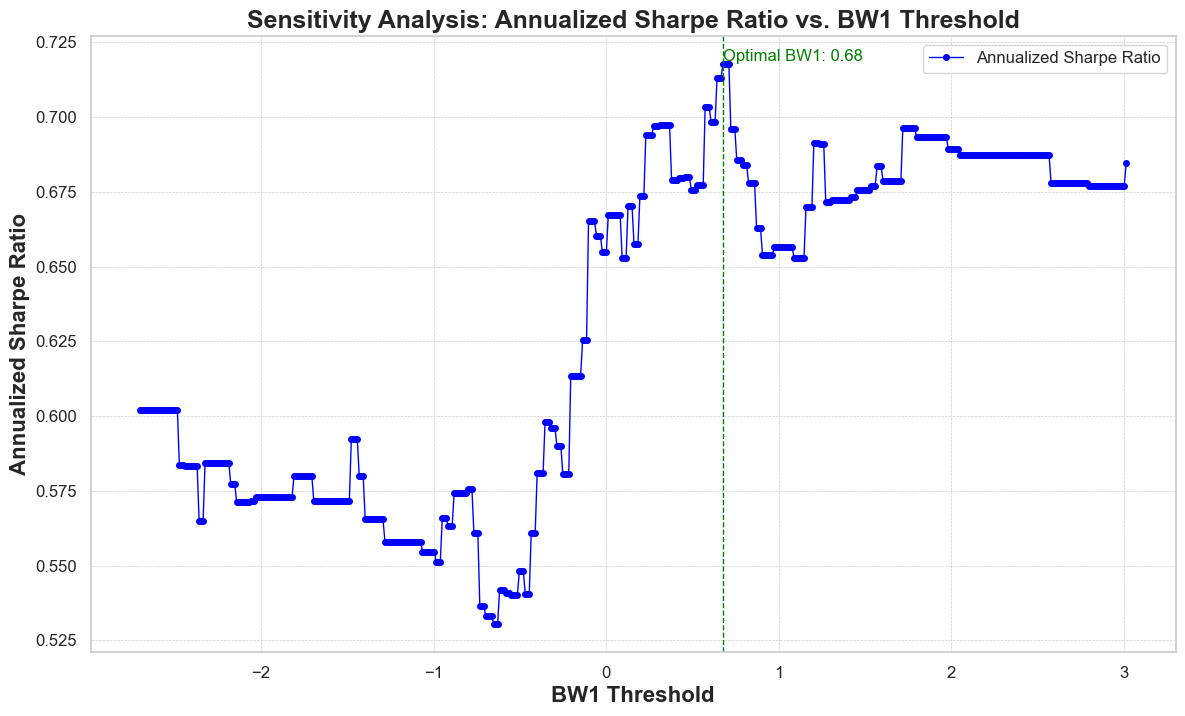

The best threshold for BW1 is: 0.68
The final portfolio value using the best threshold is: $381910.80
Final portfolio value if only Large Cap Return was held: $340850.15
Final portfolio value if only Small Cap Return was held: $375133.59
The number of binary signals generated by the trading strategy is: 178
The number of switches between Small Cap and Large Cap returns is: 18
The portfolio was invested in Small Cap returns for 43 periods (24.16% of the time).
The portfolio was invested in Large Cap returns for 135 periods (75.84% of the time).
The Sharpe ratio of the portfolio is: 0.21
The annualized Sharpe ratio of the portfolio is: 0.72
The annualized return of the portfolio is: 9.35%


In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Insampletrainingdata.csv")

# Standardize the BW1 data
scaler = StandardScaler()
data['BW1'] = scaler.fit_transform(data[['BW1']])

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    # Calculate the Sharpe ratio
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / returns.std()

def calculate_annualized_sharpe_ratio(returns, periods_per_year=12, risk_free_rate=0):
    sharpe_ratio = calculate_sharpe_ratio(returns, risk_free_rate)
    annualized_sharpe_ratio = sharpe_ratio * np.sqrt(periods_per_year)
    return annualized_sharpe_ratio

def calculate_annualized_return(portfolio_value, num_periods, periods_per_year=12):
    # Calculate the annualized return
    total_return = portfolio_value.iloc[-1] / portfolio_value.iloc[0] - 1
    annualized_return = (1 + total_return) ** (periods_per_year / num_periods) - 1
    return annualized_return

def find_optimal_threshold(data, variable_name, initial_investment=100000, threshold_range=(-2, 2), num_thresholds=500):
    data = data.dropna(subset=['Small Cap Return', 'Large Cap Return', variable_name])
    data['Small Cap Return'] = data['Small Cap Return'].ffill()
    data['Large Cap Return'] = data['Large Cap Return'].ffill()
    data[variable_name] = data[variable_name].ffill()

    thresholds = np.linspace(min(data[variable_name].min(), threshold_range[0]), max(data[variable_name].max(), threshold_range[1]), num_thresholds)
    sharpe_ratios = []
    annualized_sharpe_ratios = []
    annualized_returns = []
    optimal_threshold = None
    max_sharpe_ratio = -np.inf
    best_trade_signals = None
    best_portfolio_value = None
    best_annualized_return = None
    best_annualized_sharpe_ratio = None

    for threshold in thresholds:
        data['Trade Signal'] = data[variable_name].shift(1).apply(lambda x: 1 if x > threshold else 0)
        data['Selected Return'] = data.apply(lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
        data['Strategy Return'] = data['Selected Return']
        data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return'] / 100).cumprod()
        sharpe_ratio = calculate_sharpe_ratio(data['Strategy Return'])
        annualized_sharpe_ratio = calculate_annualized_sharpe_ratio(data['Strategy Return'])
        annualized_return = calculate_annualized_return(data['Portfolio Value'], len(data))
        sharpe_ratios.append(sharpe_ratio)
        annualized_sharpe_ratios.append(annualized_sharpe_ratio)
        annualized_returns.append(annualized_return)

        if sharpe_ratio > max_sharpe_ratio:
            max_sharpe_ratio = sharpe_ratio
            optimal_threshold = threshold
            best_trade_signals = data['Trade Signal'].copy()
            best_portfolio_value = data['Portfolio Value'].iloc[-1]
            best_annualized_return = annualized_return
            best_annualized_sharpe_ratio = annualized_sharpe_ratio

    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))
    plt.plot(thresholds, annualized_sharpe_ratios, label='Annualized Sharpe Ratio', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)
    plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
    plt.text(optimal_threshold, max(annualized_sharpe_ratios), f'Optimal {variable_name}: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')
    plt.title(f'Sensitivity Analysis: Annualized Sharpe Ratio vs. {variable_name} Threshold', fontsize=18, fontweight='bold')
    plt.xlabel(f'{variable_name} Threshold', fontsize=16, fontweight='bold')
    plt.ylabel('Annualized Sharpe Ratio', fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    num_signals = best_trade_signals.count()
    num_switches = (best_trade_signals.diff().abs() == 1).sum()
    num_small_cap = (best_trade_signals == 1).sum()
    num_large_cap = (best_trade_signals == 0).sum()
    total_periods = len(best_trade_signals)

    print(f"The best threshold for {variable_name} is: {optimal_threshold:.2f}")
    print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
    print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
    print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
    print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
    print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")
    print(f"The Sharpe ratio of the portfolio is: {max_sharpe_ratio:.2f}")
    print(f"The annualized Sharpe ratio of the portfolio is: {best_annualized_sharpe_ratio:.2f}")
    print(f"The annualized return of the portfolio is: {best_annualized_return:.2%}")

    return optimal_threshold

# Find the optimal threshold for BW1
optimal_threshold_bw1 = find_optimal_threshold(data, 'BW1')


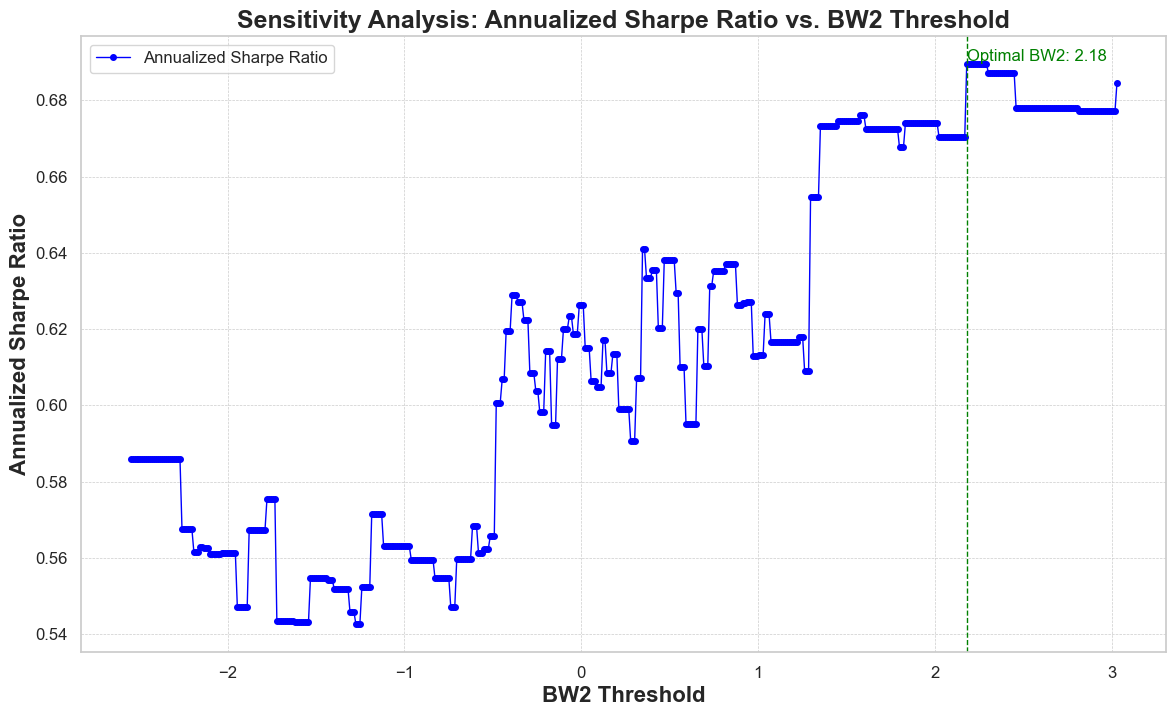

The best threshold for BW2 is: 2.18
The final portfolio value using the best threshold is: $342992.81
Final portfolio value if only Large Cap Return was held: $340850.15
Final portfolio value if only Small Cap Return was held: $375133.59
The number of binary signals generated by the trading strategy is: 178
The number of switches between Small Cap and Large Cap returns is: 4
The portfolio was invested in Small Cap returns for 4 periods (2.25% of the time).
The portfolio was invested in Large Cap returns for 174 periods (97.75% of the time).
The Sharpe ratio of the portfolio is: 0.20
The annualized Sharpe ratio of the portfolio is: 0.69
The annualized return of the portfolio is: 8.56%


In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Insampletrainingdata.csv")

# Standardize the BW2 data
scaler = StandardScaler()
data['BW2'] = scaler.fit_transform(data[['BW2']])

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    # Calculate the Sharpe ratio
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / returns.std()

def calculate_annualized_sharpe_ratio(returns, periods_per_year=12, risk_free_rate=0):
    sharpe_ratio = calculate_sharpe_ratio(returns, risk_free_rate)
    annualized_sharpe_ratio = sharpe_ratio * np.sqrt(periods_per_year)
    return annualized_sharpe_ratio

def calculate_annualized_return(portfolio_value, num_periods, periods_per_year=12):
    # Calculate the annualized return
    total_return = portfolio_value.iloc[-1] / portfolio_value.iloc[0] - 1
    annualized_return = (1 + total_return) ** (periods_per_year / num_periods) - 1
    return annualized_return

def find_optimal_threshold(data, variable_name, initial_investment=100000, threshold_range=(-2, 2), num_thresholds=500):
    data = data.dropna(subset=['Small Cap Return', 'Large Cap Return', variable_name])
    data['Small Cap Return'] = data['Small Cap Return'].ffill()
    data['Large Cap Return'] = data['Large Cap Return'].ffill()
    data[variable_name] = data[variable_name].ffill()

    thresholds = np.linspace(min(data[variable_name].min(), threshold_range[0]), max(data[variable_name].max(), threshold_range[1]), num_thresholds)
    sharpe_ratios = []
    annualized_sharpe_ratios = []
    annualized_returns = []
    optimal_threshold = None
    max_sharpe_ratio = -np.inf
    best_trade_signals = None
    best_portfolio_value = None
    best_annualized_return = None
    best_annualized_sharpe_ratio = None

    for threshold in thresholds:
        data['Trade Signal'] = data[variable_name].shift(1).apply(lambda x: 1 if x > threshold else 0)
        data['Selected Return'] = data.apply(lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
        data['Strategy Return'] = data['Selected Return']
        data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return'] / 100).cumprod()
        sharpe_ratio = calculate_sharpe_ratio(data['Strategy Return'])
        annualized_sharpe_ratio = calculate_annualized_sharpe_ratio(data['Strategy Return'])
        annualized_return = calculate_annualized_return(data['Portfolio Value'], len(data))
        sharpe_ratios.append(sharpe_ratio)
        annualized_sharpe_ratios.append(annualized_sharpe_ratio)
        annualized_returns.append(annualized_return)

        if sharpe_ratio > max_sharpe_ratio:
            max_sharpe_ratio = sharpe_ratio
            optimal_threshold = threshold
            best_trade_signals = data['Trade Signal'].copy()
            best_portfolio_value = data['Portfolio Value'].iloc[-1]
            best_annualized_return = annualized_return
            best_annualized_sharpe_ratio = annualized_sharpe_ratio

    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))
    plt.plot(thresholds, annualized_sharpe_ratios, label='Annualized Sharpe Ratio', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)
    plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
    plt.text(optimal_threshold, max(annualized_sharpe_ratios), f'Optimal {variable_name}: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')
    plt.title(f'Sensitivity Analysis: Annualized Sharpe Ratio vs. {variable_name} Threshold', fontsize=18, fontweight='bold')
    plt.xlabel(f'{variable_name} Threshold', fontsize=16, fontweight='bold')
    plt.ylabel('Annualized Sharpe Ratio', fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    num_signals = best_trade_signals.count()
    num_switches = (best_trade_signals.diff().abs() == 1).sum()
    num_small_cap = (best_trade_signals == 1).sum()
    num_large_cap = (best_trade_signals == 0).sum()
    total_periods = len(best_trade_signals)

    print(f"The best threshold for {variable_name} is: {optimal_threshold:.2f}")
    print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
    print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
    print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
    print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
    print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")
    print(f"The Sharpe ratio of the portfolio is: {max_sharpe_ratio:.2f}")
    print(f"The annualized Sharpe ratio of the portfolio is: {best_annualized_sharpe_ratio:.2f}")
    print(f"The annualized return of the portfolio is: {best_annualized_return:.2%}")

    return optimal_threshold

# Find the optimal threshold for BW2
optimal_threshold_bw2 = find_optimal_threshold(data, 'BW2')


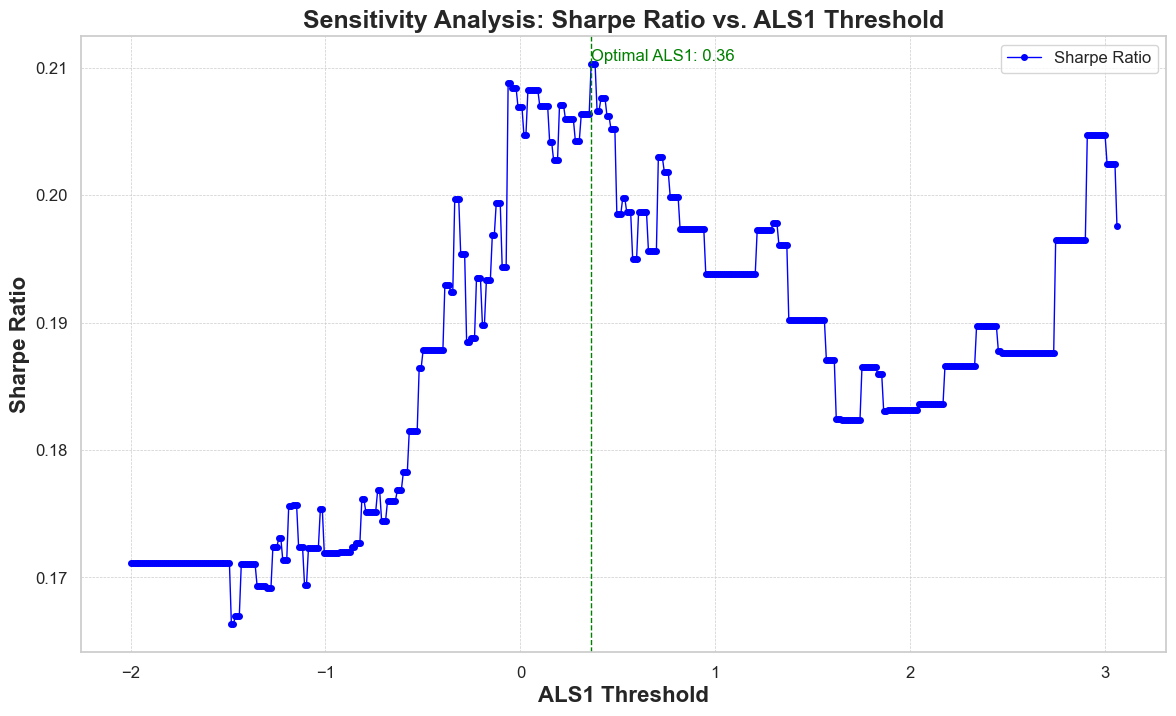

The best threshold for ALS1 is: 0.36
The final portfolio value using the best threshold is: $456596.17
Final portfolio value if only Large Cap Return was held: $340850.15
Final portfolio value if only Small Cap Return was held: $375133.59
The number of binary signals generated by the trading strategy is: 178
The number of switches between Small Cap and Large Cap returns is: 10
The portfolio was invested in Small Cap returns for 49 periods (27.53% of the time).
The portfolio was invested in Large Cap returns for 129 periods (72.47% of the time).
The Sharpe ratio of the portfolio is: 0.21
The annualized return of the portfolio is: 10.67%


In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Insampletrainingdata.csv")

# Standardize the ALS1 data
scaler = StandardScaler()
data['ALS1'] = scaler.fit_transform(data[['ALS1']])

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    # Calculate the Sharpe ratio
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / returns.std()

def calculate_annualized_return(portfolio_value, num_periods, periods_per_year=12):
    # Calculate the annualized return
    total_return = portfolio_value.iloc[-1] / portfolio_value.iloc[0] - 1
    annualized_return = (1 + total_return) ** (periods_per_year / num_periods) - 1
    return annualized_return

def find_optimal_threshold(data, variable_name, initial_investment=100000, threshold_range=(-2, 2), num_thresholds=500):
    data = data.dropna(subset=['Small Cap Return', 'Large Cap Return', variable_name])
    data['Small Cap Return'] = data['Small Cap Return'].ffill()
    data['Large Cap Return'] = data['Large Cap Return'].ffill()
    data[variable_name] = data[variable_name].ffill()

    thresholds = np.linspace(min(data[variable_name].min(), threshold_range[0]), max(data[variable_name].max(), threshold_range[1]), num_thresholds)
    sharpe_ratios = []
    annualized_returns = []
    optimal_threshold = None
    max_sharpe_ratio = -np.inf
    best_trade_signals = None
    best_portfolio_value = None
    best_annualized_return = None

    for threshold in thresholds:
        data['Trade Signal'] = data[variable_name].shift(1).apply(lambda x: 1 if x > threshold else 0)
        data['Selected Return'] = data.apply(lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
        data['Strategy Return'] = data['Selected Return']
        data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return'] / 100).cumprod()
        sharpe_ratio = calculate_sharpe_ratio(data['Strategy Return'])
        annualized_return = calculate_annualized_return(data['Portfolio Value'], len(data))
        sharpe_ratios.append(sharpe_ratio)
        annualized_returns.append(annualized_return)

        if sharpe_ratio > max_sharpe_ratio:
            max_sharpe_ratio = sharpe_ratio
            optimal_threshold = threshold
            best_trade_signals = data['Trade Signal'].copy()
            best_portfolio_value = data['Portfolio Value'].iloc[-1]
            best_annualized_return = annualized_return

    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))
    plt.plot(thresholds, sharpe_ratios, label='Sharpe Ratio', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)
    plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
    plt.text(optimal_threshold, max(sharpe_ratios), f'Optimal {variable_name}: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')
    plt.title(f'Sensitivity Analysis: Sharpe Ratio vs. {variable_name} Threshold', fontsize=18, fontweight='bold')
    plt.xlabel(f'{variable_name} Threshold', fontsize=16, fontweight='bold')
    plt.ylabel('Sharpe Ratio', fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    num_signals = best_trade_signals.count()
    num_switches = (best_trade_signals.diff().abs() == 1).sum()
    num_small_cap = (best_trade_signals == 1).sum()
    num_large_cap = (best_trade_signals == 0).sum()
    total_periods = len(best_trade_signals)

    print(f"The best threshold for {variable_name} is: {optimal_threshold:.2f}")
    print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
    print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
    print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
    print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
    print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")
    print(f"The Sharpe ratio of the portfolio is: {max_sharpe_ratio:.2f}")
    print(f"The annualized return of the portfolio is: {best_annualized_return:.2%}")

    return optimal_threshold

# Find the optimal threshold for ALS1
optimal_threshold_als1 = find_optimal_threshold(data, 'ALS1')


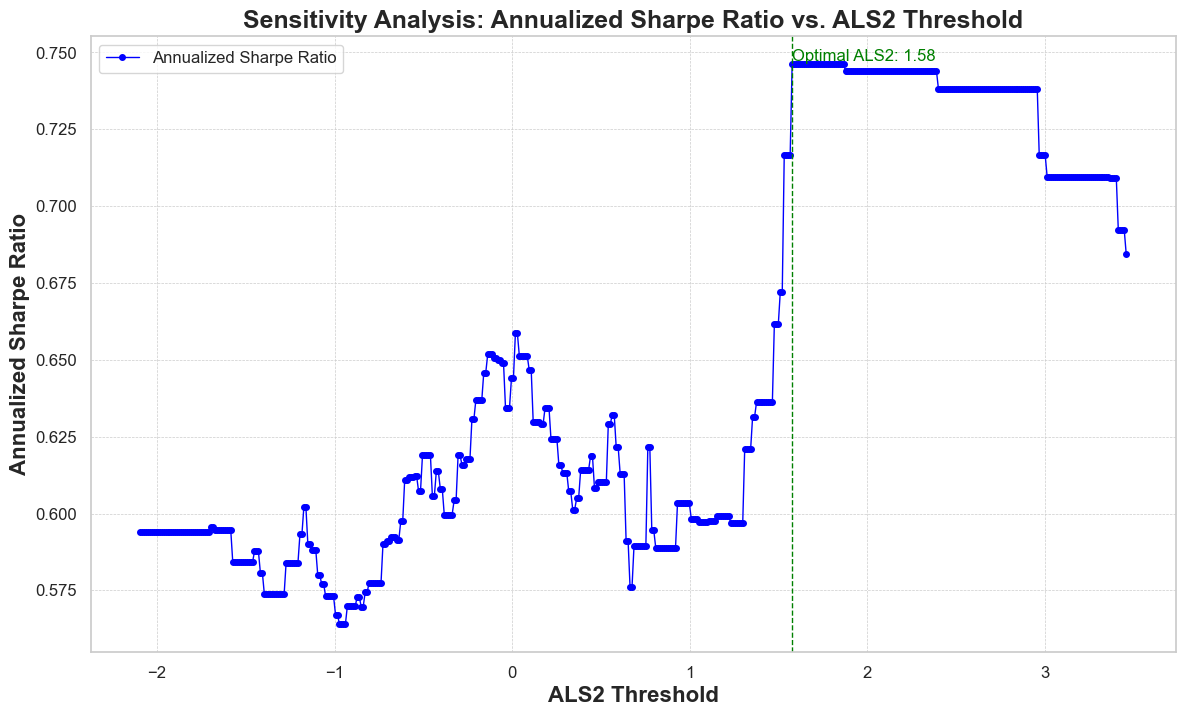

The best threshold for ALS2 is: 1.58
The final portfolio value using the best threshold is: $397305.28
Final portfolio value if only Large Cap Return was held: $340850.15
Final portfolio value if only Small Cap Return was held: $375133.59
The number of binary signals generated by the trading strategy is: 178
The number of switches between Small Cap and Large Cap returns is: 4
The portfolio was invested in Small Cap returns for 7 periods (3.93% of the time).
The portfolio was invested in Large Cap returns for 171 periods (96.07% of the time).
The Sharpe ratio of the portfolio is: 0.22
The annualized Sharpe ratio of the portfolio is: 0.75
The annualized return of the portfolio is: 9.64%


In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Insampletrainingdata.csv")

# Standardize the ALS2 data
scaler = StandardScaler()
data['ALS2'] = scaler.fit_transform(data[['ALS2']])

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    # Calculate the Sharpe ratio
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / returns.std()

def calculate_annualized_sharpe_ratio(returns, periods_per_year=12, risk_free_rate=0):
    sharpe_ratio = calculate_sharpe_ratio(returns, risk_free_rate)
    annualized_sharpe_ratio = sharpe_ratio * np.sqrt(periods_per_year)
    return annualized_sharpe_ratio

def calculate_annualized_return(portfolio_value, num_periods, periods_per_year=12):
    # Calculate the annualized return
    total_return = portfolio_value.iloc[-1] / portfolio_value.iloc[0] - 1
    annualized_return = (1 + total_return) ** (periods_per_year / num_periods) - 1
    return annualized_return

def find_optimal_threshold(data, variable_name, initial_investment=100000, threshold_range=(-2, 2), num_thresholds=500):
    data = data.dropna(subset=['Small Cap Return', 'Large Cap Return', variable_name])
    data['Small Cap Return'] = data['Small Cap Return'].ffill()
    data['Large Cap Return'] = data['Large Cap Return'].ffill()
    data[variable_name] = data[variable_name].ffill()

    thresholds = np.linspace(min(data[variable_name].min(), threshold_range[0]), max(data[variable_name].max(), threshold_range[1]), num_thresholds)
    sharpe_ratios = []
    annualized_sharpe_ratios = []
    annualized_returns = []
    optimal_threshold = None
    max_sharpe_ratio = -np.inf
    best_trade_signals = None
    best_portfolio_value = None
    best_annualized_return = None
    best_annualized_sharpe_ratio = None

    for threshold in thresholds:
        data['Trade Signal'] = data[variable_name].shift(1).apply(lambda x: 1 if x > threshold else 0)
        data['Selected Return'] = data.apply(lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
        data['Strategy Return'] = data['Selected Return']
        data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return'] / 100).cumprod()
        sharpe_ratio = calculate_sharpe_ratio(data['Strategy Return'])
        annualized_sharpe_ratio = calculate_annualized_sharpe_ratio(data['Strategy Return'])
        annualized_return = calculate_annualized_return(data['Portfolio Value'], len(data))
        sharpe_ratios.append(sharpe_ratio)
        annualized_sharpe_ratios.append(annualized_sharpe_ratio)
        annualized_returns.append(annualized_return)

        if sharpe_ratio > max_sharpe_ratio:
            max_sharpe_ratio = sharpe_ratio
            optimal_threshold = threshold
            best_trade_signals = data['Trade Signal'].copy()
            best_portfolio_value = data['Portfolio Value'].iloc[-1]
            best_annualized_return = annualized_return
            best_annualized_sharpe_ratio = annualized_sharpe_ratio

    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))
    plt.plot(thresholds, annualized_sharpe_ratios, label='Annualized Sharpe Ratio', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)
    plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
    plt.text(optimal_threshold, max(annualized_sharpe_ratios), f'Optimal {variable_name}: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')
    plt.title(f'Sensitivity Analysis: Annualized Sharpe Ratio vs. {variable_name} Threshold', fontsize=18, fontweight='bold')
    plt.xlabel(f'{variable_name} Threshold', fontsize=16, fontweight='bold')
    plt.ylabel('Annualized Sharpe Ratio', fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    num_signals = best_trade_signals.count()
    num_switches = (best_trade_signals.diff().abs() == 1).sum()
    num_small_cap = (best_trade_signals == 1).sum()
    num_large_cap = (best_trade_signals == 0).sum()
    total_periods = len(best_trade_signals)

    print(f"The best threshold for {variable_name} is: {optimal_threshold:.2f}")
    print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
    print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
    print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
    print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
    print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")
    print(f"The Sharpe ratio of the portfolio is: {max_sharpe_ratio:.2f}")
    print(f"The annualized Sharpe ratio of the portfolio is: {best_annualized_sharpe_ratio:.2f}")
    print(f"The annualized return of the portfolio is: {best_annualized_return:.2%}")

    return optimal_threshold

# Find the optimal threshold for ALS2
optimal_threshold_als2 = find_optimal_threshold(data, 'ALS2')


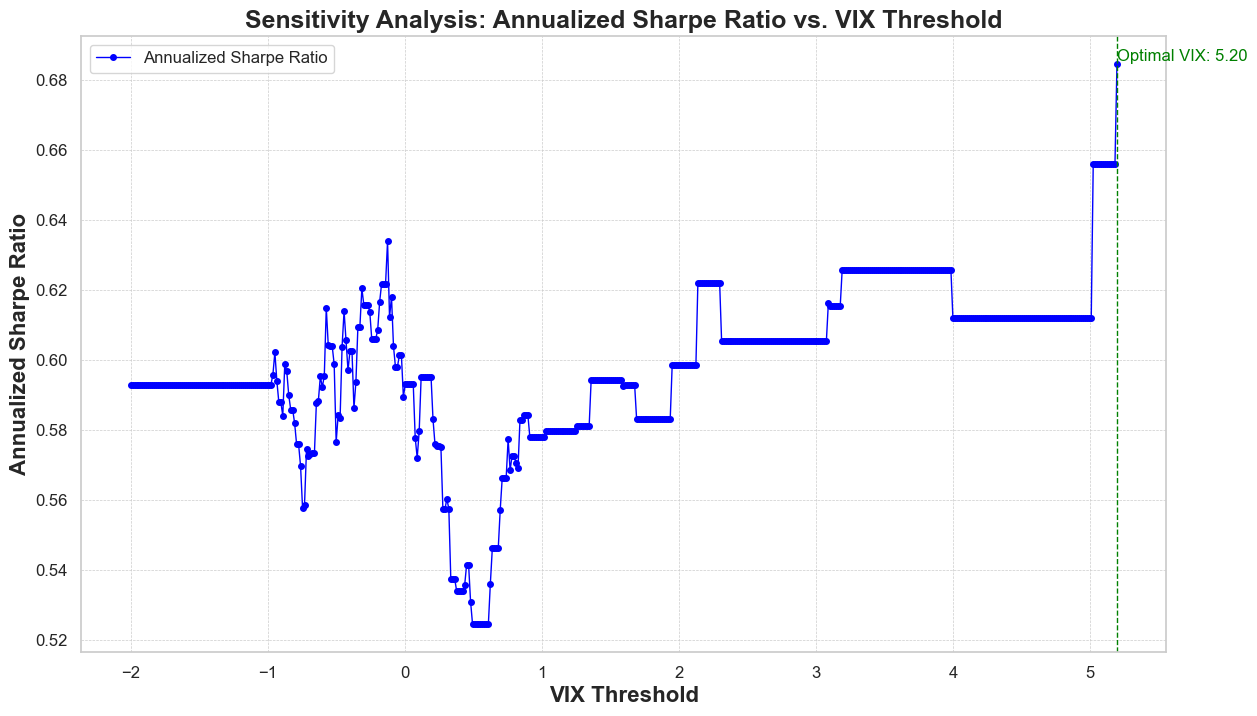

The best threshold for VIX is: 5.20
The final portfolio value using the best threshold is: $340850.15
Final portfolio value if only Large Cap Return was held: $340850.15
Final portfolio value if only Small Cap Return was held: $375133.59
The number of binary signals generated by the trading strategy is: 178
The number of switches between Small Cap and Large Cap returns is: 0
The portfolio was invested in Small Cap returns for 0 periods (0.00% of the time).
The portfolio was invested in Large Cap returns for 178 periods (100.00% of the time).
The Sharpe ratio of the portfolio is: 0.20
The annualized Sharpe ratio of the portfolio is: 0.68
The annualized return of the portfolio is: 8.51%


In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Insampletrainingdata.csv")

# Standardize the VIX data
scaler = StandardScaler()
data['VIX'] = scaler.fit_transform(data[['VIX']])

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    # Calculate the Sharpe ratio
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / returns.std()

def calculate_annualized_sharpe_ratio(returns, periods_per_year=12, risk_free_rate=0):
    sharpe_ratio = calculate_sharpe_ratio(returns, risk_free_rate)
    annualized_sharpe_ratio = sharpe_ratio * np.sqrt(periods_per_year)
    return annualized_sharpe_ratio

def calculate_annualized_return(portfolio_value, num_periods, periods_per_year=12):
    # Calculate the annualized return
    total_return = portfolio_value.iloc[-1] / portfolio_value.iloc[0] - 1
    annualized_return = (1 + total_return) ** (periods_per_year / num_periods) - 1
    return annualized_return

def find_optimal_threshold(data, variable_name, initial_investment=100000, threshold_range=(-2, 2), num_thresholds=500):
    data = data.dropna(subset=['Small Cap Return', 'Large Cap Return', variable_name])
    data['Small Cap Return'] = data['Small Cap Return'].ffill()
    data['Large Cap Return'] = data['Large Cap Return'].ffill()
    data[variable_name] = data[variable_name].ffill()

    thresholds = np.linspace(min(data[variable_name].min(), threshold_range[0]), max(data[variable_name].max(), threshold_range[1]), num_thresholds)
    sharpe_ratios = []
    annualized_sharpe_ratios = []
    annualized_returns = []
    optimal_threshold = None
    max_sharpe_ratio = -np.inf
    best_trade_signals = None
    best_portfolio_value = None
    best_annualized_return = None
    best_annualized_sharpe_ratio = None

    for threshold in thresholds:
        data['Trade Signal'] = data[variable_name].shift(1).apply(lambda x: 1 if x > threshold else 0)
        data['Selected Return'] = data.apply(lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
        data['Strategy Return'] = data['Selected Return']
        data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return'] / 100).cumprod()
        sharpe_ratio = calculate_sharpe_ratio(data['Strategy Return'])
        annualized_sharpe_ratio = calculate_annualized_sharpe_ratio(data['Strategy Return'])
        annualized_return = calculate_annualized_return(data['Portfolio Value'], len(data))
        sharpe_ratios.append(sharpe_ratio)
        annualized_sharpe_ratios.append(annualized_sharpe_ratio)
        annualized_returns.append(annualized_return)

        if sharpe_ratio > max_sharpe_ratio:
            max_sharpe_ratio = sharpe_ratio
            optimal_threshold = threshold
            best_trade_signals = data['Trade Signal'].copy()
            best_portfolio_value = data['Portfolio Value'].iloc[-1]
            best_annualized_return = annualized_return
            best_annualized_sharpe_ratio = annualized_sharpe_ratio

    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))
    plt.plot(thresholds, annualized_sharpe_ratios, label='Annualized Sharpe Ratio', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)
    plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
    plt.text(optimal_threshold, max(annualized_sharpe_ratios), f'Optimal {variable_name}: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')
    plt.title(f'Sensitivity Analysis: Annualized Sharpe Ratio vs. {variable_name} Threshold', fontsize=18, fontweight='bold')
    plt.xlabel(f'{variable_name} Threshold', fontsize=16, fontweight='bold')
    plt.ylabel('Annualized Sharpe Ratio', fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    num_signals = best_trade_signals.count()
    num_switches = (best_trade_signals.diff().abs() == 1).sum()
    num_small_cap = (best_trade_signals == 1).sum()
    num_large_cap = (best_trade_signals == 0).sum()
    total_periods = len(best_trade_signals)

    print(f"The best threshold for {variable_name} is: {optimal_threshold:.2f}")
    print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
    print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
    print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
    print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
    print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")
    print(f"The Sharpe ratio of the portfolio is: {max_sharpe_ratio:.2f}")
    print(f"The annualized Sharpe ratio of the portfolio is: {best_annualized_sharpe_ratio:.2f}")
    print(f"The annualized return of the portfolio is: {best_annualized_return:.2%}")

    return optimal_threshold

# Find the optimal threshold for VIX
optimal_threshold_vix = find_optimal_threshold(data, 'VIX')


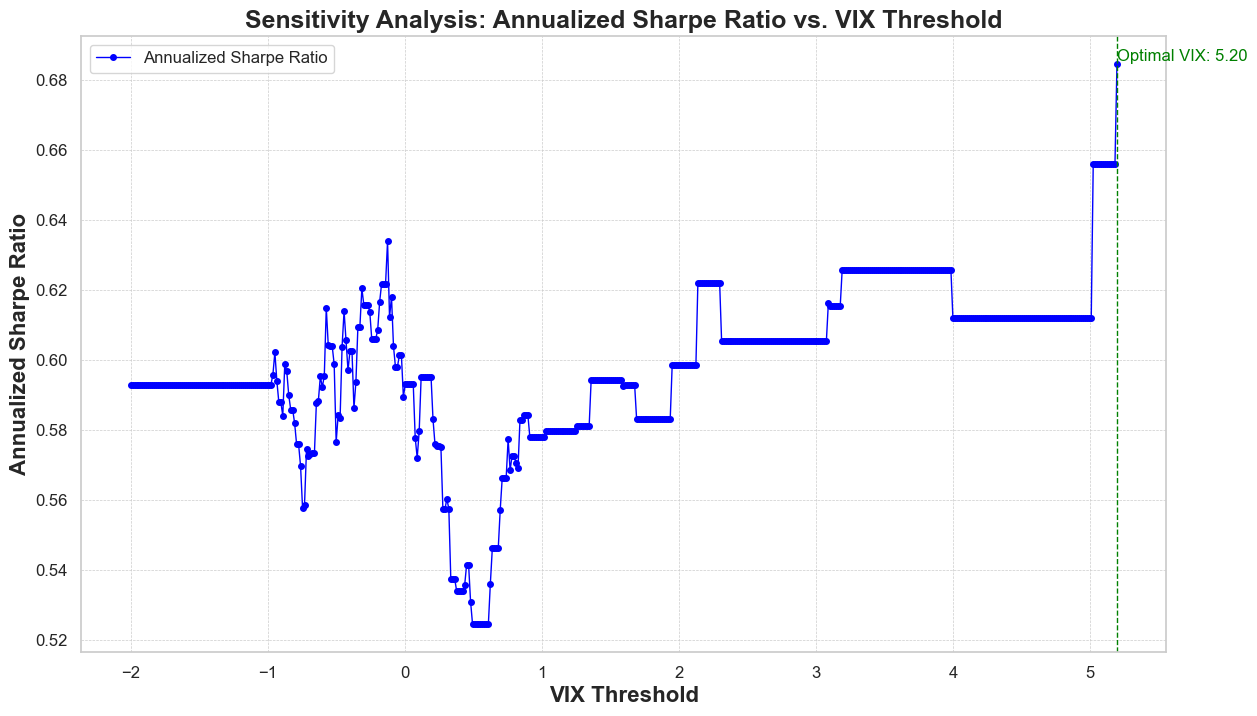

The best threshold for VIX is: 5.20
The final portfolio value using the best threshold is: $340850.15
Final portfolio value if only Large Cap Return was held: $340850.15
Final portfolio value if only Small Cap Return was held: $375133.59
The number of binary signals generated by the trading strategy is: 178
The number of switches between Small Cap and Large Cap returns is: 0
The portfolio was invested in Small Cap returns for 0 periods (0.00% of the time).
The portfolio was invested in Large Cap returns for 178 periods (100.00% of the time).
The Sharpe ratio of the portfolio is: 0.20
The annualized Sharpe ratio of the portfolio is: 0.68
The annualized return of the portfolio is: 8.51%


In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Insampletrainingdata.csv")

# Standardize the VIX data
scaler = StandardScaler()
data['VIX'] = scaler.fit_transform(data[['VIX']])

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    # Calculate the Sharpe ratio
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / returns.std()

def calculate_annualized_sharpe_ratio(returns, periods_per_year=12, risk_free_rate=0):
    sharpe_ratio = calculate_sharpe_ratio(returns, risk_free_rate)
    annualized_sharpe_ratio = sharpe_ratio * np.sqrt(periods_per_year)
    return annualized_sharpe_ratio

def calculate_annualized_return(portfolio_value, num_periods, periods_per_year=12):
    # Calculate the annualized return
    total_return = portfolio_value.iloc[-1] / portfolio_value.iloc[0] - 1
    annualized_return = (1 + total_return) ** (periods_per_year / num_periods) - 1
    return annualized_return

def find_optimal_threshold(data, variable_name, initial_investment=100000, threshold_range=(-2, 2), num_thresholds=500):
    data = data.dropna(subset=['Small Cap Return', 'Large Cap Return', variable_name])
    data['Small Cap Return'] = data['Small Cap Return'].ffill()
    data['Large Cap Return'] = data['Large Cap Return'].ffill()
    data[variable_name] = data[variable_name].ffill()

    thresholds = np.linspace(min(data[variable_name].min(), threshold_range[0]), max(data[variable_name].max(), threshold_range[1]), num_thresholds)
    sharpe_ratios = []
    annualized_sharpe_ratios = []
    annualized_returns = []
    optimal_threshold = None
    max_sharpe_ratio = -np.inf
    best_trade_signals = None
    best_portfolio_value = None
    best_annualized_return = None
    best_annualized_sharpe_ratio = None

    for threshold in thresholds:
        data['Trade Signal'] = data[variable_name].shift(1).apply(lambda x: 1 if x > threshold else 0)
        data['Selected Return'] = data.apply(lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
        data['Strategy Return'] = data['Selected Return']
        data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return'] / 100).cumprod()
        sharpe_ratio = calculate_sharpe_ratio(data['Strategy Return'])
        annualized_sharpe_ratio = calculate_annualized_sharpe_ratio(data['Strategy Return'])
        annualized_return = calculate_annualized_return(data['Portfolio Value'], len(data))
        sharpe_ratios.append(sharpe_ratio)
        annualized_sharpe_ratios.append(annualized_sharpe_ratio)
        annualized_returns.append(annualized_return)

        if sharpe_ratio > max_sharpe_ratio:
            max_sharpe_ratio = sharpe_ratio
            optimal_threshold = threshold
            best_trade_signals = data['Trade Signal'].copy()
            best_portfolio_value = data['Portfolio Value'].iloc[-1]
            best_annualized_return = annualized_return
            best_annualized_sharpe_ratio = annualized_sharpe_ratio

    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))
    plt.plot(thresholds, annualized_sharpe_ratios, label='Annualized Sharpe Ratio', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)
    plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
    plt.text(optimal_threshold, max(annualized_sharpe_ratios), f'Optimal {variable_name}: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')
    plt.title(f'Sensitivity Analysis: Annualized Sharpe Ratio vs. {variable_name} Threshold', fontsize=18, fontweight='bold')
    plt.xlabel(f'{variable_name} Threshold', fontsize=16, fontweight='bold')
    plt.ylabel('Annualized Sharpe Ratio', fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    num_signals = best_trade_signals.count()
    num_switches = (best_trade_signals.diff().abs() == 1).sum()
    num_small_cap = (best_trade_signals == 1).sum()
    num_large_cap = (best_trade_signals == 0).sum()
    total_periods = len(best_trade_signals)

    print(f"The best threshold for {variable_name} is: {optimal_threshold:.2f}")
    print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
    print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
    print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
    print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
    print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")
    print(f"The Sharpe ratio of the portfolio is: {max_sharpe_ratio:.2f}")
    print(f"The annualized Sharpe ratio of the portfolio is: {best_annualized_sharpe_ratio:.2f}")
    print(f"The annualized return of the portfolio is: {best_annualized_return:.2%}")

    return optimal_threshold

# Find the optimal threshold for VIX
optimal_threshold_vix = find_optimal_threshold(data, 'VIX')


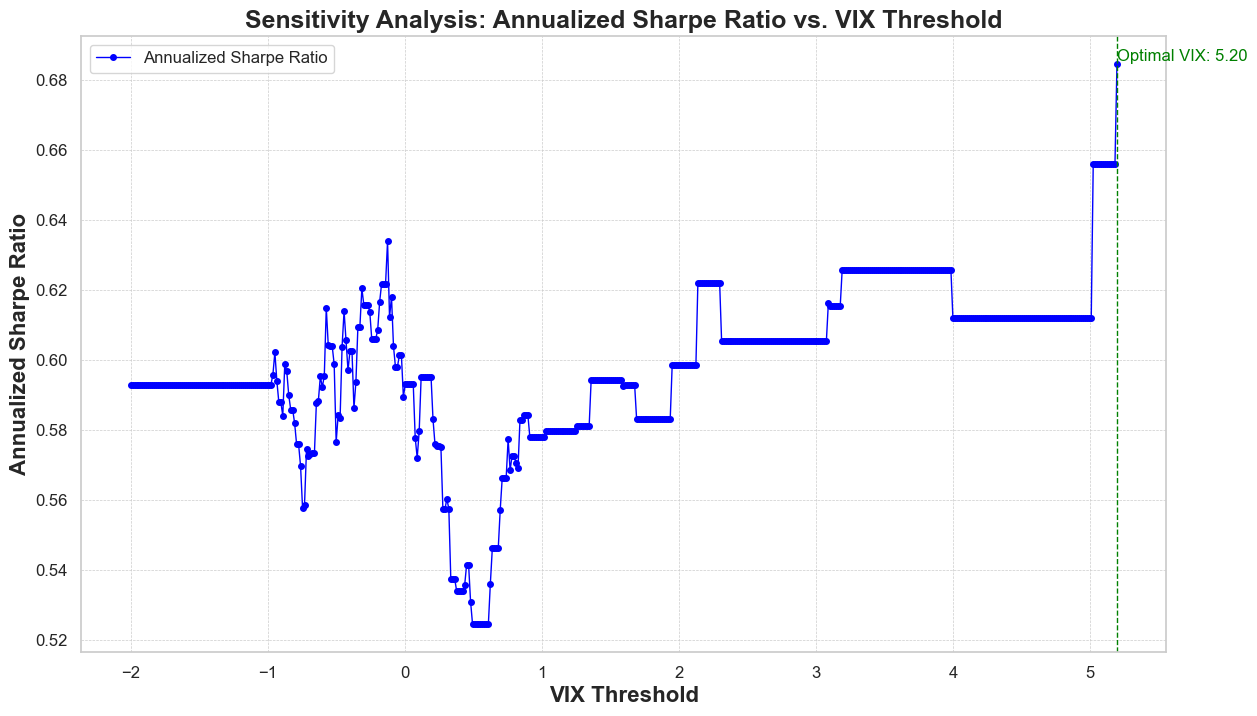

The best threshold for VIX is: 5.20
The final portfolio value using the best threshold is: $340850.15
Final portfolio value if only Large Cap Return was held: $340850.15
Final portfolio value if only Small Cap Return was held: $375133.59
The number of binary signals generated by the trading strategy is: 178
The number of switches between Small Cap and Large Cap returns is: 0
The portfolio was invested in Small Cap returns for 0 periods (0.00% of the time).
The portfolio was invested in Large Cap returns for 178 periods (100.00% of the time).
The Sharpe ratio of the portfolio is: 0.20
The annualized Sharpe ratio of the portfolio is: 0.68
The annualized return of the portfolio is: 8.51%


In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Insampletrainingdata.csv")

# Standardize the VIX data
scaler = StandardScaler()
data['VIX'] = scaler.fit_transform(data[['VIX']])

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    # Calculate the Sharpe ratio
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / returns.std()

def calculate_annualized_sharpe_ratio(returns, periods_per_year=12, risk_free_rate=0):
    sharpe_ratio = calculate_sharpe_ratio(returns, risk_free_rate)
    annualized_sharpe_ratio = sharpe_ratio * np.sqrt(periods_per_year)
    return annualized_sharpe_ratio

def calculate_annualized_return(portfolio_value, num_periods, periods_per_year=12):
    # Calculate the annualized return
    total_return = portfolio_value.iloc[-1] / portfolio_value.iloc[0] - 1
    annualized_return = (1 + total_return) ** (periods_per_year / num_periods) - 1
    return annualized_return

def find_optimal_threshold(data, variable_name, initial_investment=100000, threshold_range=(-2, 2), num_thresholds=500):
    data = data.dropna(subset=['Small Cap Return', 'Large Cap Return', variable_name])
    data['Small Cap Return'] = data['Small Cap Return'].ffill()
    data['Large Cap Return'] = data['Large Cap Return'].ffill()
    data[variable_name] = data[variable_name].ffill()

    thresholds = np.linspace(min(data[variable_name].min(), threshold_range[0]), max(data[variable_name].max(), threshold_range[1]), num_thresholds)
    sharpe_ratios = []
    annualized_sharpe_ratios = []
    annualized_returns = []
    optimal_threshold = None
    max_sharpe_ratio = -np.inf
    best_trade_signals = None
    best_portfolio_value = None
    best_annualized_return = None
    best_annualized_sharpe_ratio = None

    for threshold in thresholds:
        data['Trade Signal'] = data[variable_name].shift(1).apply(lambda x: 1 if x > threshold else 0)
        data['Selected Return'] = data.apply(lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
        data['Strategy Return'] = data['Selected Return']
        data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return'] / 100).cumprod()
        sharpe_ratio = calculate_sharpe_ratio(data['Strategy Return'])
        annualized_sharpe_ratio = calculate_annualized_sharpe_ratio(data['Strategy Return'])
        annualized_return = calculate_annualized_return(data['Portfolio Value'], len(data))
        sharpe_ratios.append(sharpe_ratio)
        annualized_sharpe_ratios.append(annualized_sharpe_ratio)
        annualized_returns.append(annualized_return)

        if sharpe_ratio > max_sharpe_ratio:
            max_sharpe_ratio = sharpe_ratio
            optimal_threshold = threshold
            best_trade_signals = data['Trade Signal'].copy()
            best_portfolio_value = data['Portfolio Value'].iloc[-1]
            best_annualized_return = annualized_return
            best_annualized_sharpe_ratio = annualized_sharpe_ratio

    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))
    plt.plot(thresholds, annualized_sharpe_ratios, label='Annualized Sharpe Ratio', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)
    plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
    plt.text(optimal_threshold, max(annualized_sharpe_ratios), f'Optimal {variable_name}: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')
    plt.title(f'Sensitivity Analysis: Annualized Sharpe Ratio vs. {variable_name} Threshold', fontsize=18, fontweight='bold')
    plt.xlabel(f'{variable_name} Threshold', fontsize=16, fontweight='bold')
    plt.ylabel('Annualized Sharpe Ratio', fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    num_signals = best_trade_signals.count()
    num_switches = (best_trade_signals.diff().abs() == 1).sum()
    num_small_cap = (best_trade_signals == 1).sum()
    num_large_cap = (best_trade_signals == 0).sum()
    total_periods = len(best_trade_signals)

    print(f"The best threshold for {variable_name} is: {optimal_threshold:.2f}")
    print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
    print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
    print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
    print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
    print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")
    print(f"The Sharpe ratio of the portfolio is: {max_sharpe_ratio:.2f}")
    print(f"The annualized Sharpe ratio of the portfolio is: {best_annualized_sharpe_ratio:.2f}")
    print(f"The annualized return of the portfolio is: {best_annualized_return:.2%}")

    return optimal_threshold

# Find the optimal threshold for VIX
optimal_threshold_vix = find_optimal_threshold(data, 'VIX')


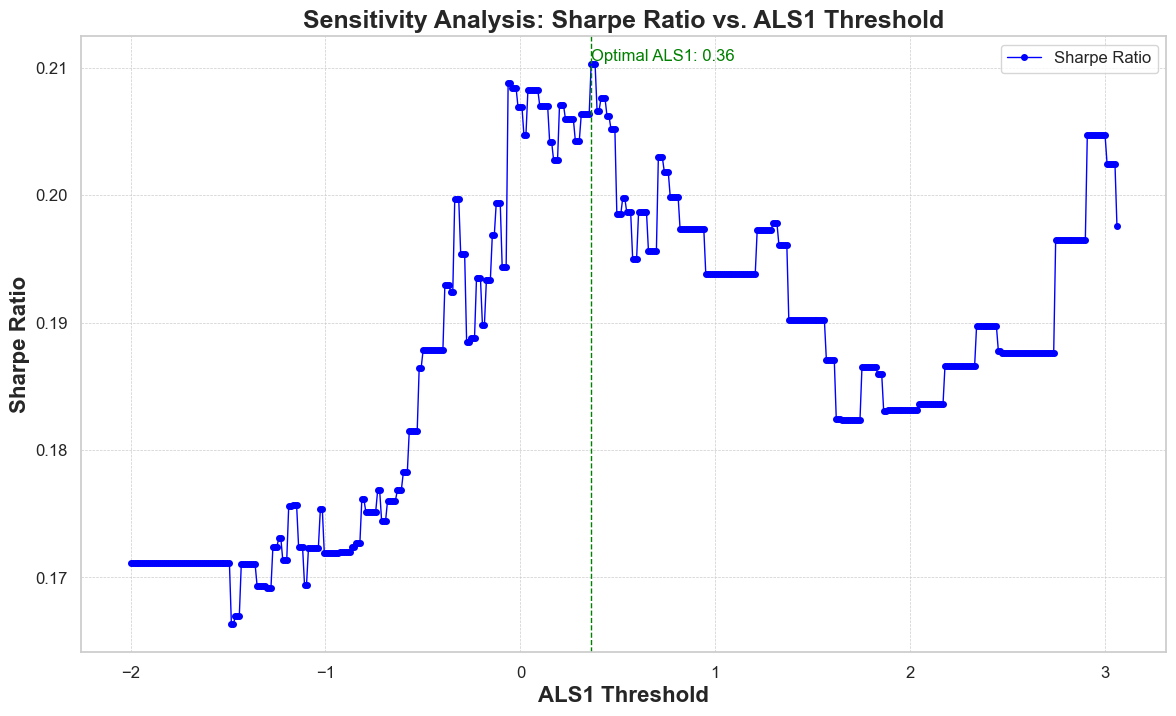

The best threshold for ALS1 is: 0.36
The final portfolio value using the best threshold is: $456596.17
Final portfolio value if only Large Cap Return was held: $340850.15
Final portfolio value if only Small Cap Return was held: $375133.59
The number of binary signals generated by the trading strategy is: 178
The number of switches between Small Cap and Large Cap returns is: 10
The portfolio was invested in Small Cap returns for 49 periods (27.53% of the time).
The portfolio was invested in Large Cap returns for 129 periods (72.47% of the time).
The Sharpe ratio of the portfolio is: 0.21


In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Insampletrainingdata.csv")

# Standardize the ALS1 data
scaler = StandardScaler()
data['ALS1'] = scaler.fit_transform(data[['ALS1']])

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    # Calculate the Sharpe ratio
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / returns.std()

def find_optimal_threshold(data, variable_name, initial_investment=100000, threshold_range=(-2, 2), num_thresholds=500):
    data = data.dropna(subset=['Small Cap Return', 'Large Cap Return', variable_name])
    data['Small Cap Return'] = data['Small Cap Return'].ffill()
    data['Large Cap Return'] = data['Large Cap Return'].ffill()
    data[variable_name] = data[variable_name].ffill()

    thresholds = np.linspace(min(data[variable_name].min(), threshold_range[0]), max(data[variable_name].max(), threshold_range[1]), num_thresholds)
    sharpe_ratios = []
    optimal_threshold = None
    max_sharpe_ratio = -np.inf
    best_trade_signals = None
    best_portfolio_value = None

    for threshold in thresholds:
        data['Trade Signal'] = data[variable_name].shift(1).apply(lambda x: 1 if x > threshold else 0)
        data['Selected Return'] = data.apply(lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
        data['Strategy Return'] = data['Selected Return']
        data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return'] / 100).cumprod()
        sharpe_ratio = calculate_sharpe_ratio(data['Strategy Return'])
        sharpe_ratios.append(sharpe_ratio)

        if sharpe_ratio > max_sharpe_ratio:
            max_sharpe_ratio = sharpe_ratio
            optimal_threshold = threshold
            best_trade_signals = data['Trade Signal'].copy()
            best_portfolio_value = data['Portfolio Value'].iloc[-1]

    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))
    plt.plot(thresholds, sharpe_ratios, label='Sharpe Ratio', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)
    plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
    plt.text(optimal_threshold, max(sharpe_ratios), f'Optimal {variable_name}: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')
    plt.title(f'Sensitivity Analysis: Sharpe Ratio vs. {variable_name} Threshold', fontsize=18, fontweight='bold')
    plt.xlabel(f'{variable_name} Threshold', fontsize=16, fontweight='bold')
    plt.ylabel('Sharpe Ratio', fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    num_signals = best_trade_signals.count()
    num_switches = (best_trade_signals.diff().abs() == 1).sum()
    num_small_cap = (best_trade_signals == 1).sum()
    num_large_cap = (best_trade_signals == 0).sum()
    total_periods = len(best_trade_signals)

    print(f"The best threshold for {variable_name} is: {optimal_threshold:.2f}")
    print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
    print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
    print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
    print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
    print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")
    print(f"The Sharpe ratio of the portfolio is: {max_sharpe_ratio:.2f}")

    return optimal_threshold

# Find the optimal threshold for ALS1
optimal_threshold_als1 = find_optimal_threshold(data, 'ALS1')


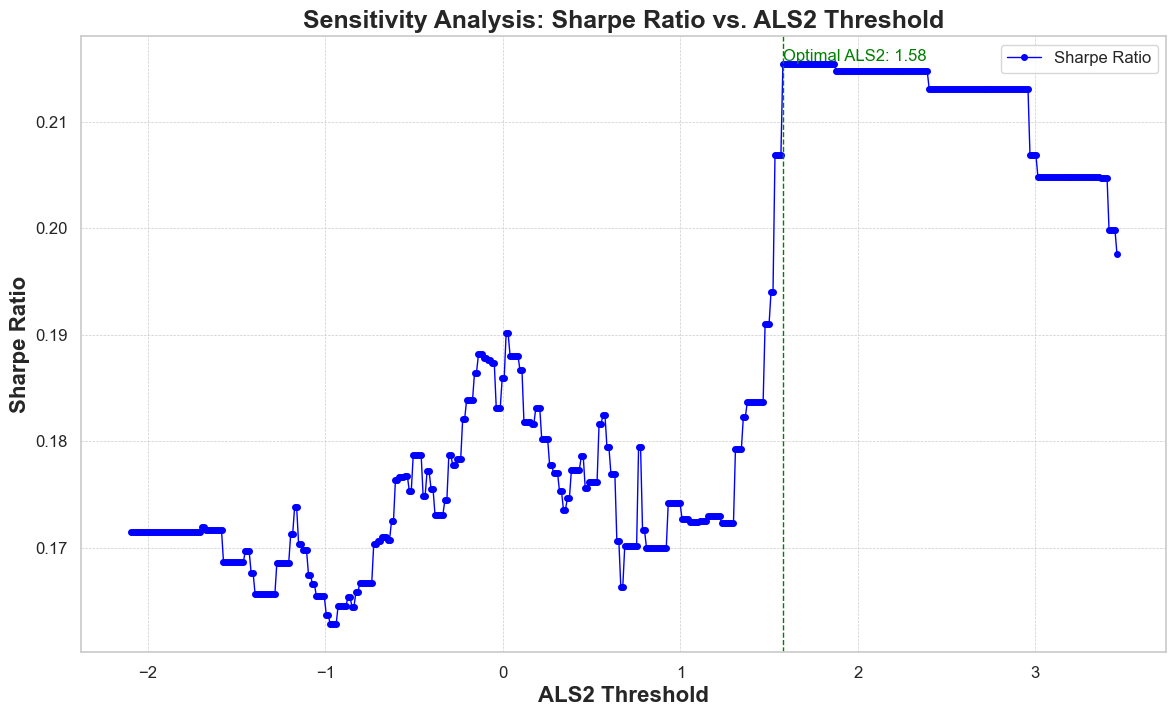

The best threshold for ALS2 is: 1.58
The final portfolio value using the best threshold is: $397305.28
Final portfolio value if only Large Cap Return was held: $340850.15
Final portfolio value if only Small Cap Return was held: $375133.59
The number of binary signals generated by the trading strategy is: 178
The number of switches between Small Cap and Large Cap returns is: 4
The portfolio was invested in Small Cap returns for 7 periods (3.93% of the time).
The portfolio was invested in Large Cap returns for 171 periods (96.07% of the time).
The Sharpe ratio of the portfolio is: 0.22


In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Insampletrainingdata.csv")

# Standardize the ALS2 data
scaler = StandardScaler()
data['ALS2'] = scaler.fit_transform(data[['ALS2']])

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    # Calculate the Sharpe ratio
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / returns.std()

def find_optimal_threshold(data, variable_name, initial_investment=100000, threshold_range=(-2, 2), num_thresholds=500):
    data = data.dropna(subset=['Small Cap Return', 'Large Cap Return', variable_name])
    data['Small Cap Return'] = data['Small Cap Return'].ffill()
    data['Large Cap Return'] = data['Large Cap Return'].ffill()
    data[variable_name] = data[variable_name].ffill()

    thresholds = np.linspace(min(data[variable_name].min(), threshold_range[0]), max(data[variable_name].max(), threshold_range[1]), num_thresholds)
    sharpe_ratios = []
    optimal_threshold = None
    max_sharpe_ratio = -np.inf
    best_trade_signals = None
    best_portfolio_value = None

    for threshold in thresholds:
        data['Trade Signal'] = data[variable_name].shift(1).apply(lambda x: 1 if x > threshold else 0)
        data['Selected Return'] = data.apply(lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
        data['Strategy Return'] = data['Selected Return']
        data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return'] / 100).cumprod()
        sharpe_ratio = calculate_sharpe_ratio(data['Strategy Return'])
        sharpe_ratios.append(sharpe_ratio)

        if sharpe_ratio > max_sharpe_ratio:
            max_sharpe_ratio = sharpe_ratio
            optimal_threshold = threshold
            best_trade_signals = data['Trade Signal'].copy()
            best_portfolio_value = data['Portfolio Value'].iloc[-1]

    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))
    plt.plot(thresholds, sharpe_ratios, label='Sharpe Ratio', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)
    plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
    plt.text(optimal_threshold, max(sharpe_ratios), f'Optimal {variable_name}: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')
    plt.title(f'Sensitivity Analysis: Sharpe Ratio vs. {variable_name} Threshold', fontsize=18, fontweight='bold')
    plt.xlabel(f'{variable_name} Threshold', fontsize=16, fontweight='bold')
    plt.ylabel('Sharpe Ratio', fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    num_signals = best_trade_signals.count()
    num_switches = (best_trade_signals.diff().abs() == 1).sum()
    num_small_cap = (best_trade_signals == 1).sum()
    num_large_cap = (best_trade_signals == 0).sum()
    total_periods = len(best_trade_signals)

    print(f"The best threshold for {variable_name} is: {optimal_threshold:.2f}")
    print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
    print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return'] / 100).cumprod().iloc[-1]:.2f}")
    print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
    print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
    print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
    print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")
    print(f"The Sharpe ratio of the portfolio is: {max_sharpe_ratio:.2f}")

    return optimal_threshold

# Find the optimal threshold for ALS2
optimal_threshold_als2 = find_optimal_threshold(data, 'ALS2')
